<a href="https://colab.research.google.com/github/Jcnok/curso_Flai/blob/main/Compet23_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação 23/07

** Preparação dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mudando para o diretório de estudo
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Flai/torneio/2307")

In [ ]:
plt.style.use('seaborn-darkgrid')

In [ ]:
# Carregando os dados de teste, treino e a base original.
teste= pd.read_csv('teste_final_max.csv')
treino = pd.read_csv('treino_final_max.csv')

In [ ]:
treino.head()

indice  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0       0  Female              0  ...          19.70       406.95     No
1       1  Female              0  ...          65.50      3801.30     No
2       2  Female              0  ...          60.30      4109.00     No
3       3  Female              0  ...          50.15      1655.35     No
4       4    Male              1  ...          46.30        46.30     No

[5 rows x 23 columns]

In [ ]:
treino_final = treino

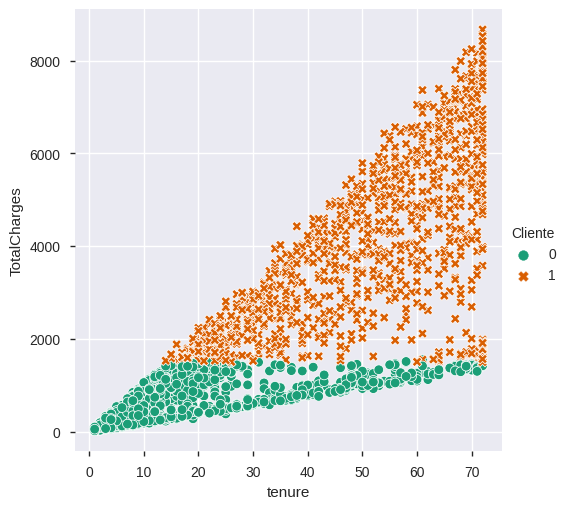

In [ ]:
sns.set_palette("Dark2")

#gráfico de relação entre as variáveis: 'tenure' vs 'TotalCharges', separadas pela variável 'Cliente'.
sns.relplot(x="tenure", y="TotalCharges", hue="Cliente", style='Cliente', data=treino_final);
# Pelo gráfico usando as duas variáveis de maior correlação podemos visualizar que os dados estão até que bem divididos, nesse caso acredito que podemos encontrar um bom modelo de classificação.

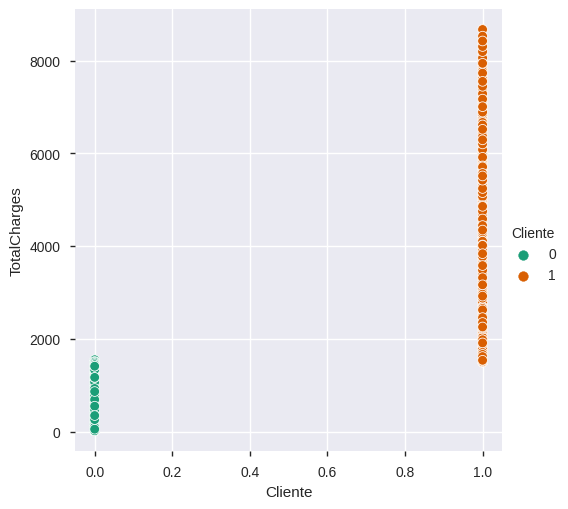

In [ ]:
#gráfico de relação entre as variáveis: 'cliente' vs 'TotalCharges', separadas pela variável 'Cliente'.
sns.relplot(x="Cliente", y="TotalCharges", hue="Cliente", data=treino_final);
# o ponto de interseção estão por volta de 1400 a 1600, vamos ver qual o maior valor para totalcharges para os clientes de status normal e o de menor valor para os premium.

In [ ]:
treino_final[['TotalCharges','Cliente']].groupby('Cliente').describe()
#Bom aqui podemos ver que a interseção esta entre 1500.50 e 1551.60 pois dentro desses valores exitem tanto cliente premium como normal

TotalCharges                            ...                           
               count         mean          std  ...      50%      75%      max
Cliente                                         ...                           
0             1323.0   548.270219   452.407031  ...   433.50   917.75  1551.60
1             1177.0  4167.107816  1873.284005  ...  3959.35  5608.40  8672.45

[2 rows x 8 columns]

In [ ]:
treino_final.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Cliente', 'indice', 'customerID', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
# Transformando a variável Churn em binário para verificar se existe alguma correlação de importância.
treino_final['Churn'] = treino_final['Churn'].map({'No':0, 'Yes':1})
treino_final.head()
# Transformando a variável Churn em binário para verificar se existe alguma correlação de importância.
teste['Churn'] = teste['Churn'].map({'No':0, 'Yes':1})


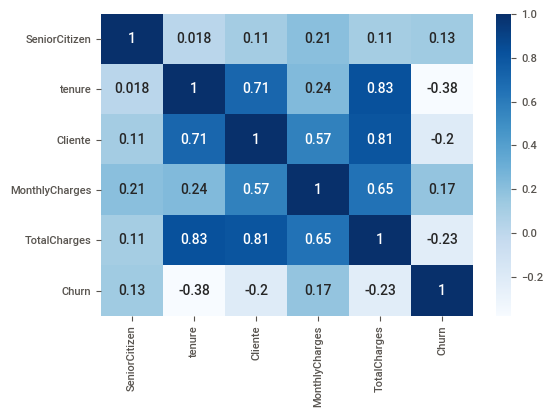

In [ ]:
#gráfico de correlação heatmap
sns.heatmap(treino_final.corr(), annot=True, cmap="Blues")
# as variáveis de maior importância são TotalCharges, tenure, MonthlyCharges conforme a ordem de importância.

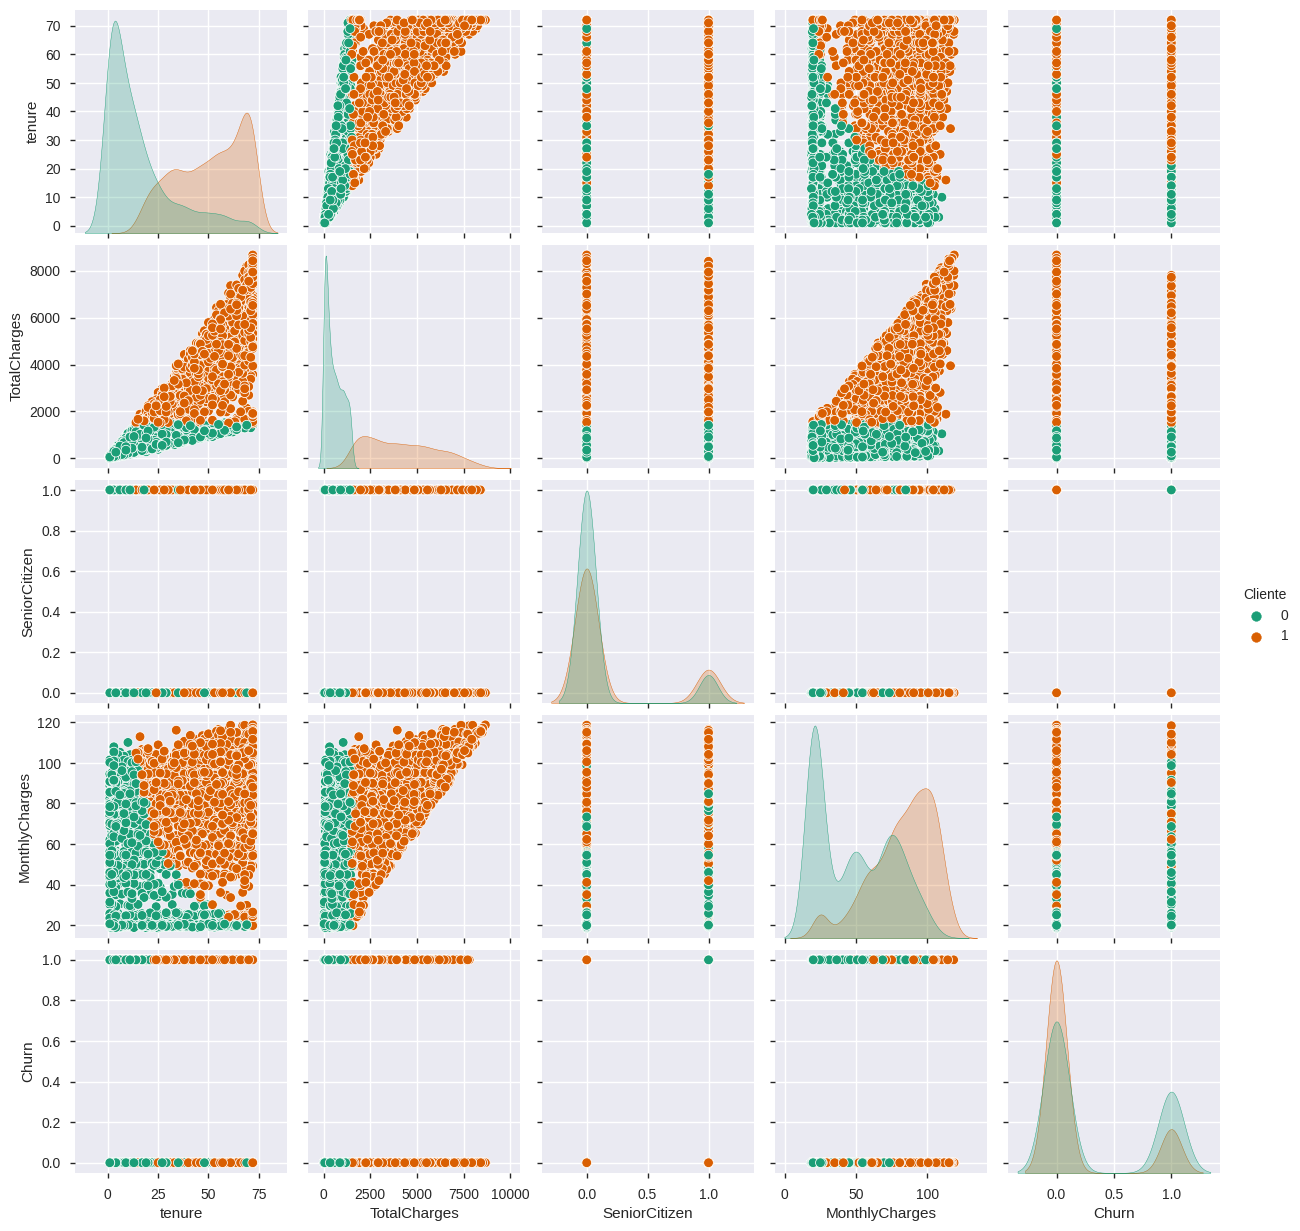

In [ ]:
sns.pairplot(treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn','Cliente']], hue='Cliente')

In [ ]:
# instalando a biblioteca
!pip install sweetviz -q

     |████████████████████████████████| 15.1 MB 181 kB/s 


In [ ]:
# importando os pacotes necessários
import sweetviz

In [ ]:
# criando o relatório
relatorio = sweetviz.analyze(treino_final)

                                             |          | [  0%]   00:00 -> (? left)


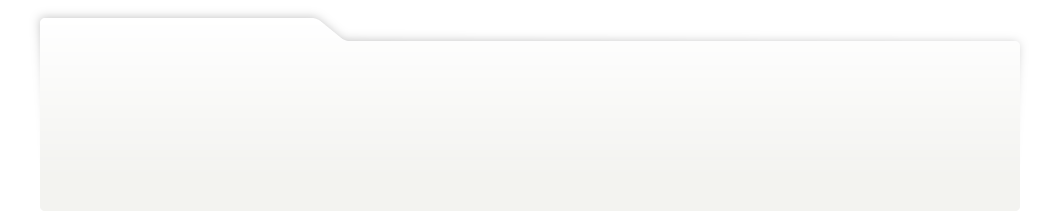
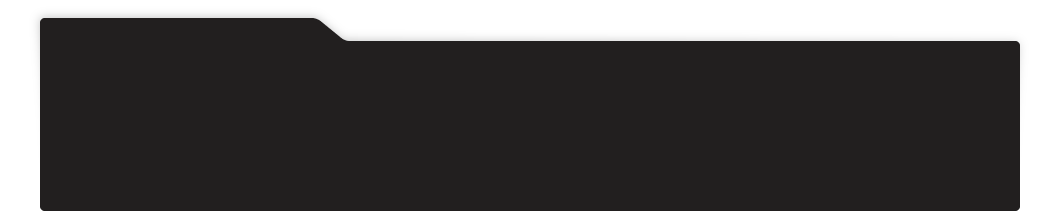
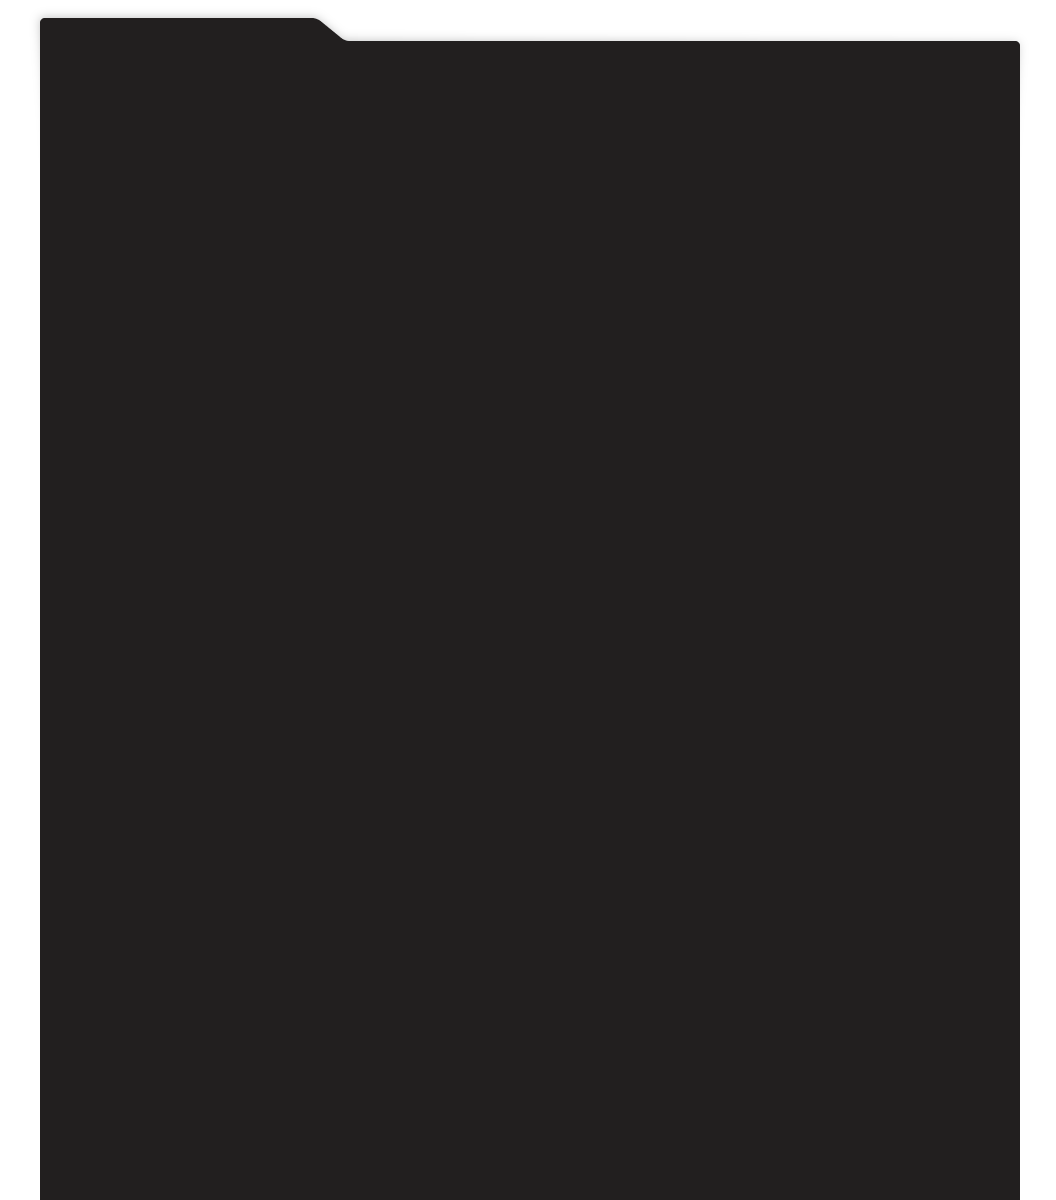
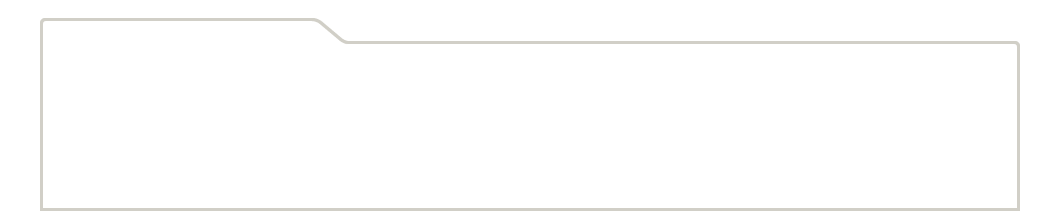
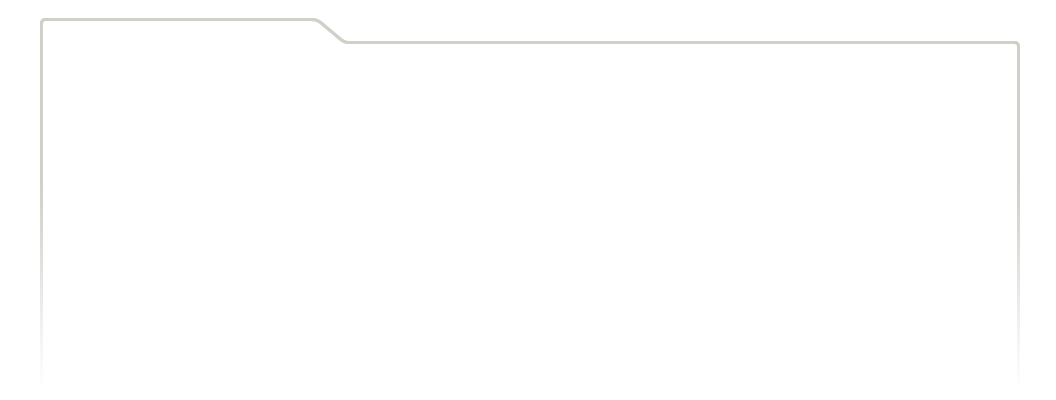
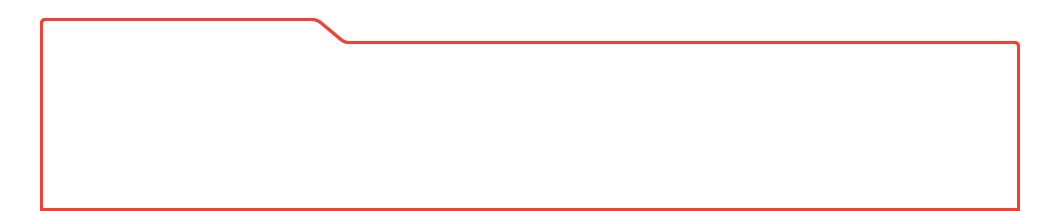
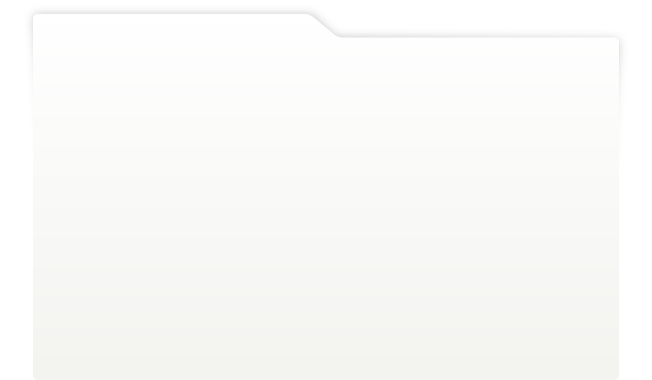
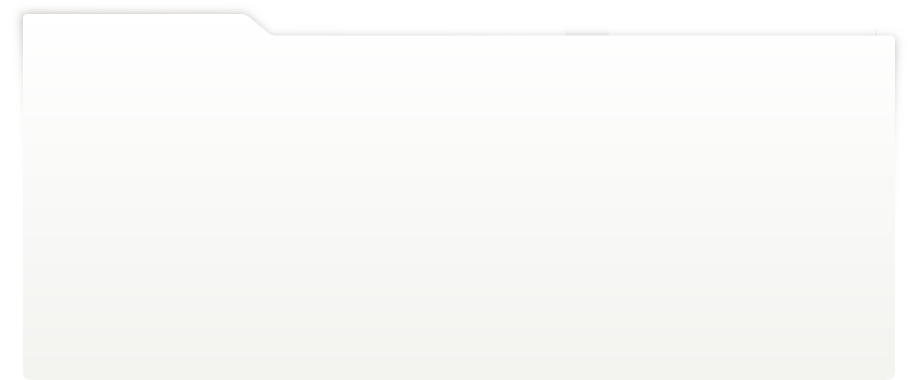
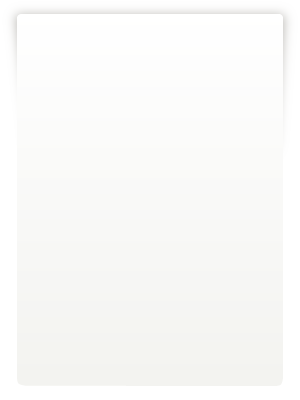
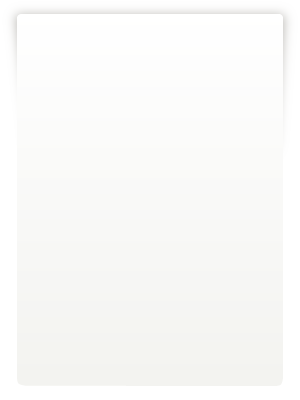
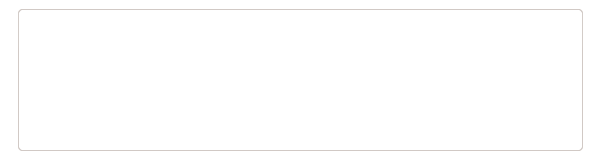
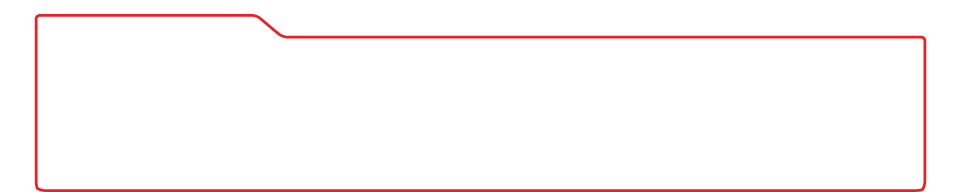
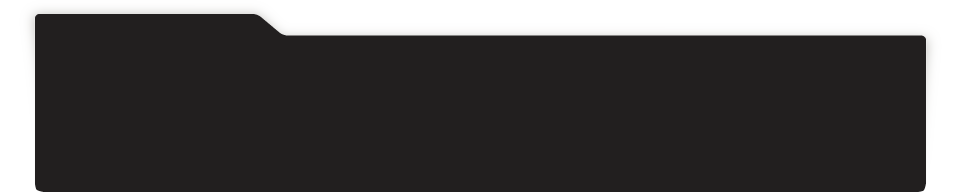
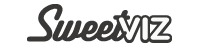
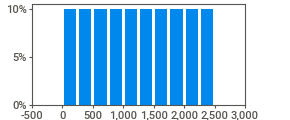
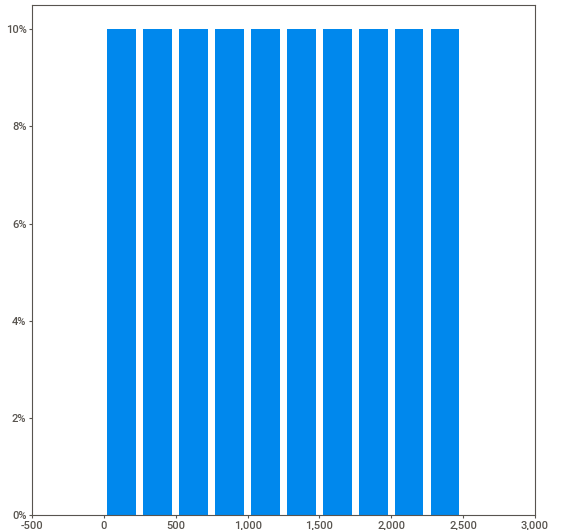
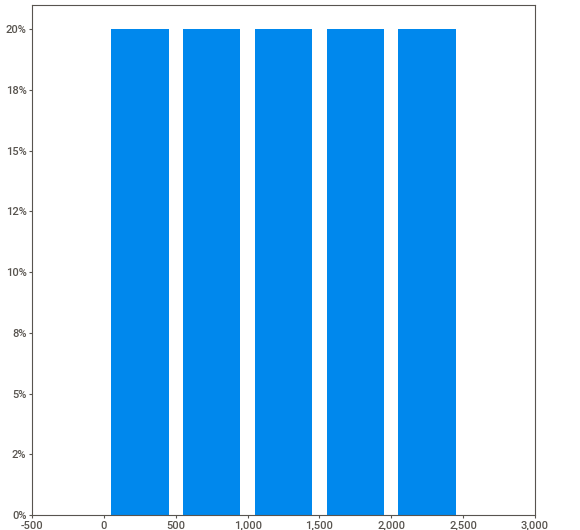
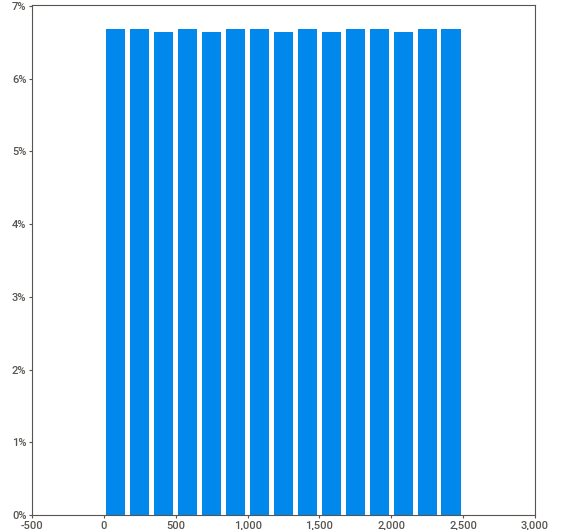
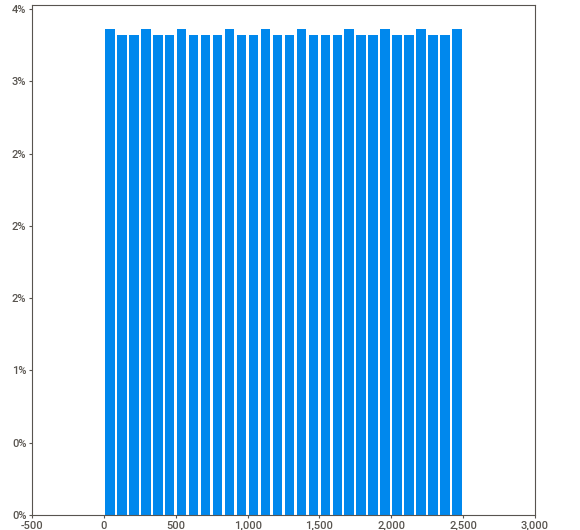
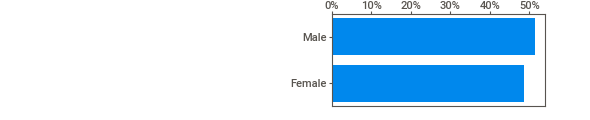
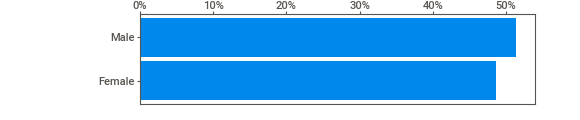
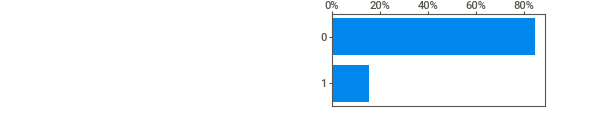
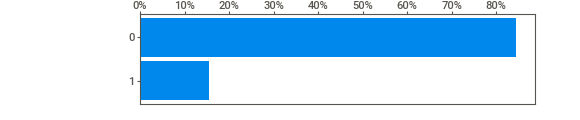
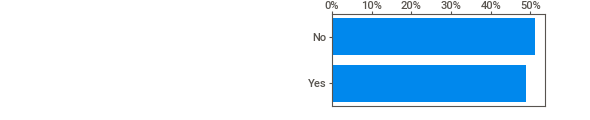
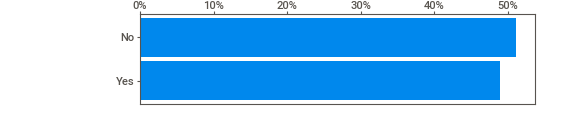
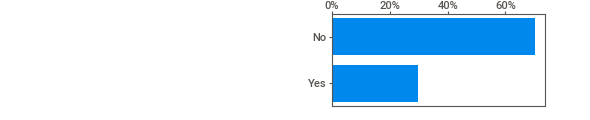
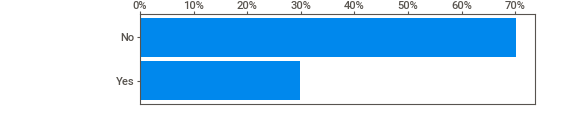
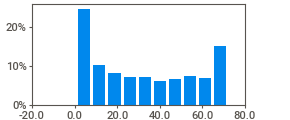
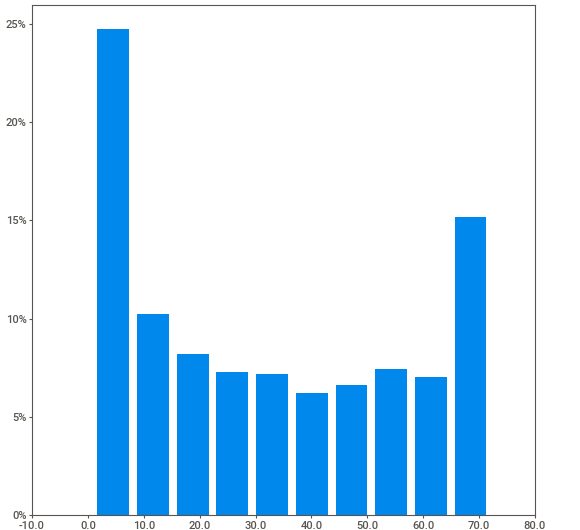
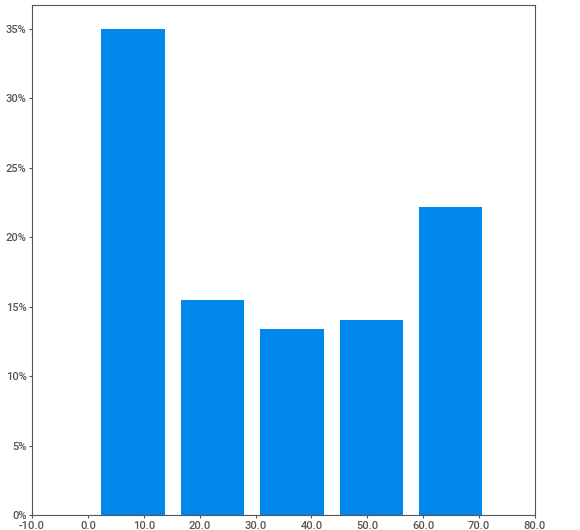
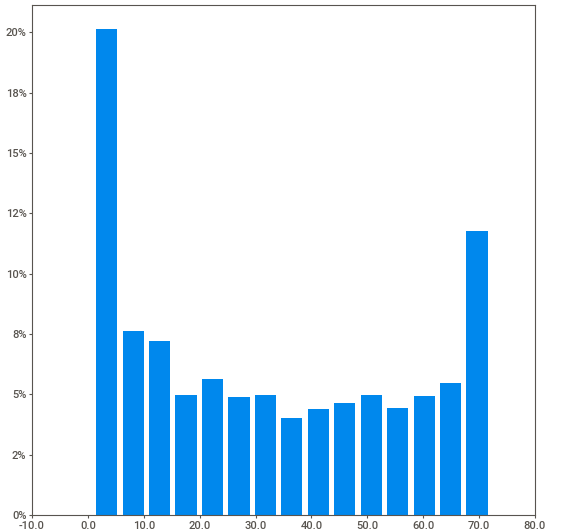
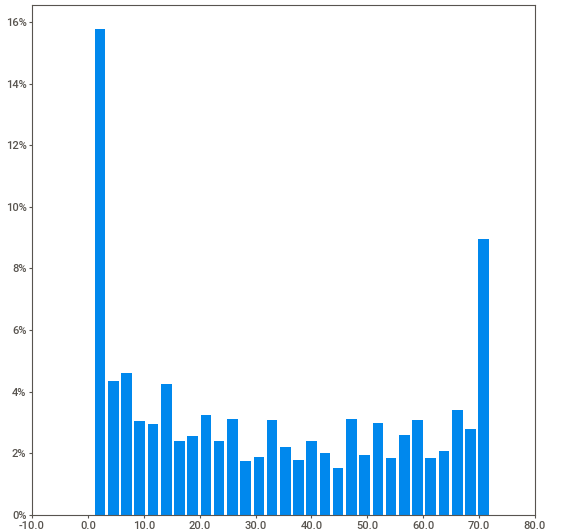
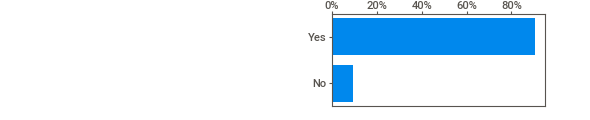
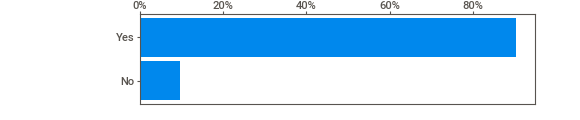
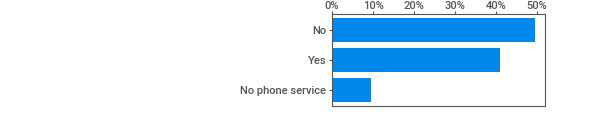
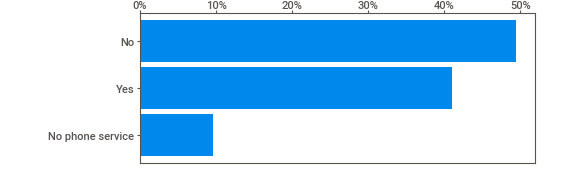
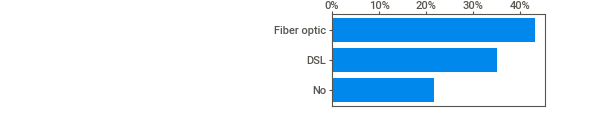
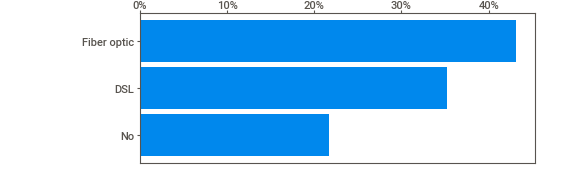
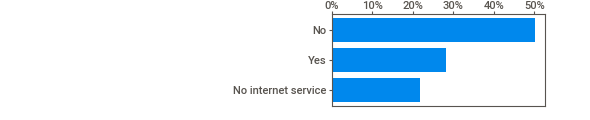
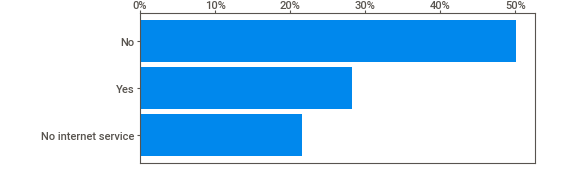
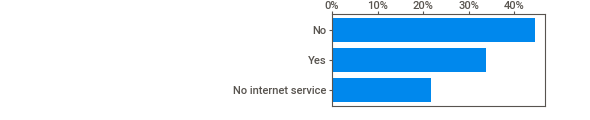
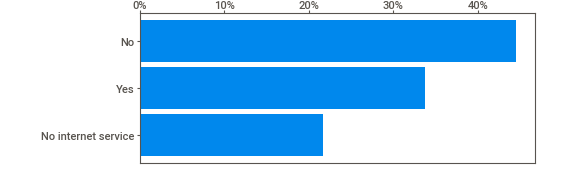
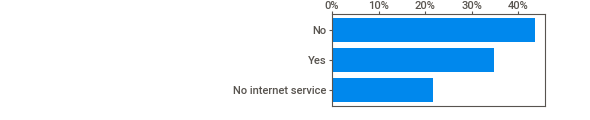
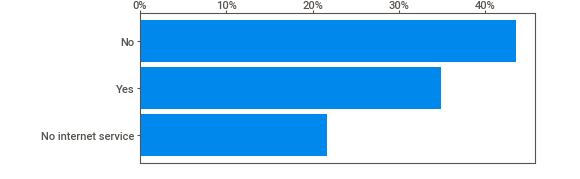
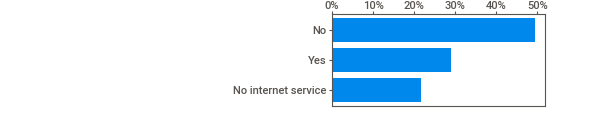
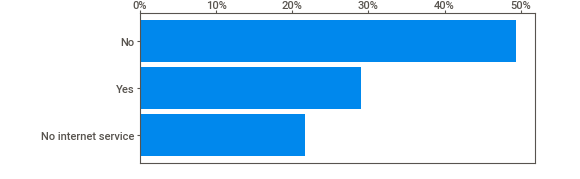
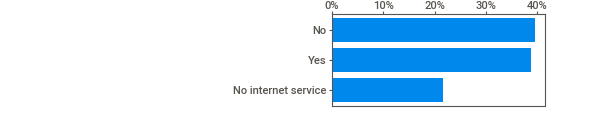
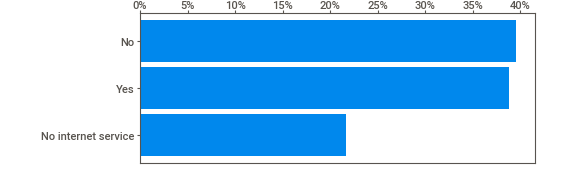
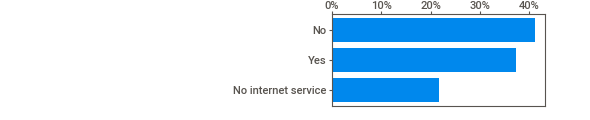
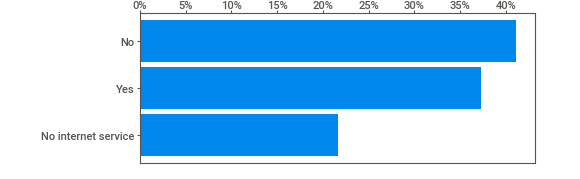
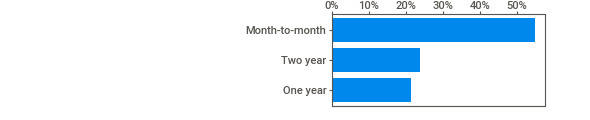
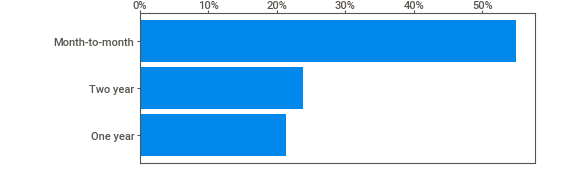
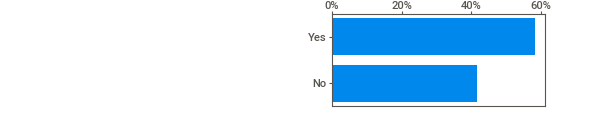
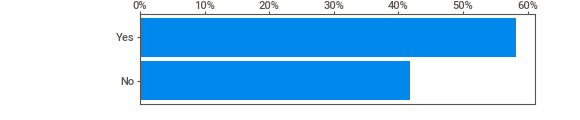
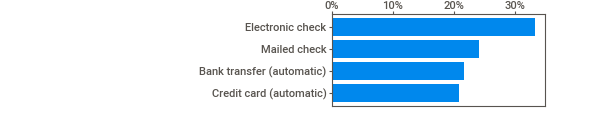
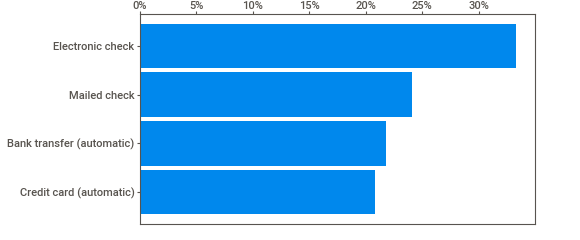
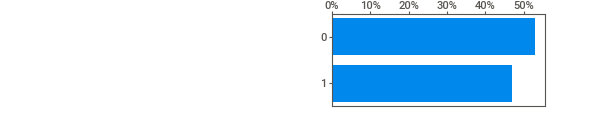
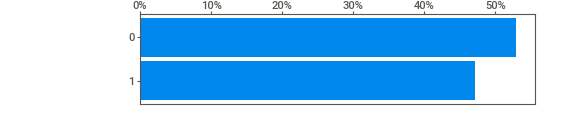
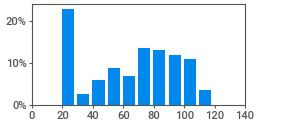
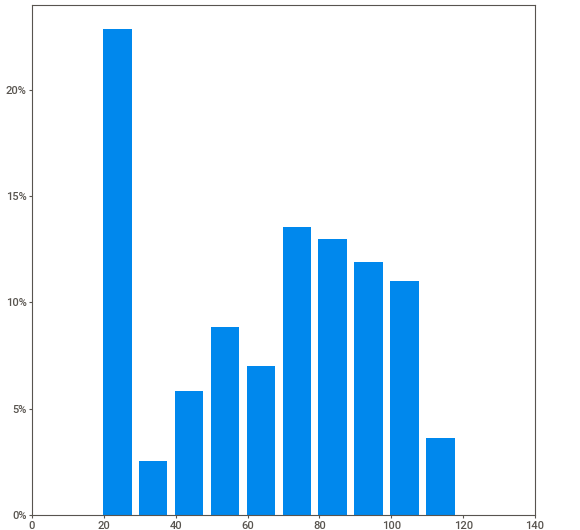
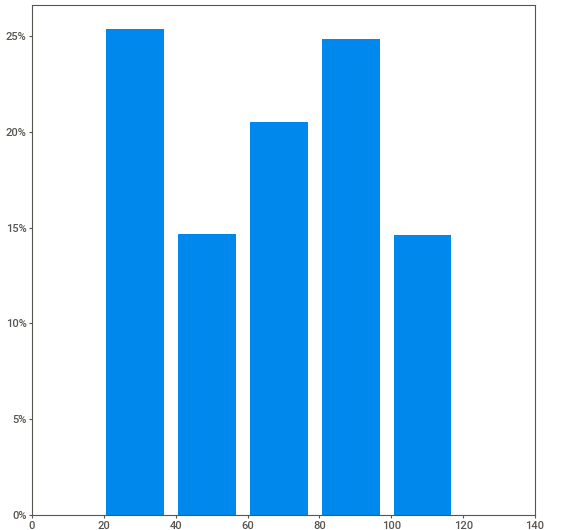
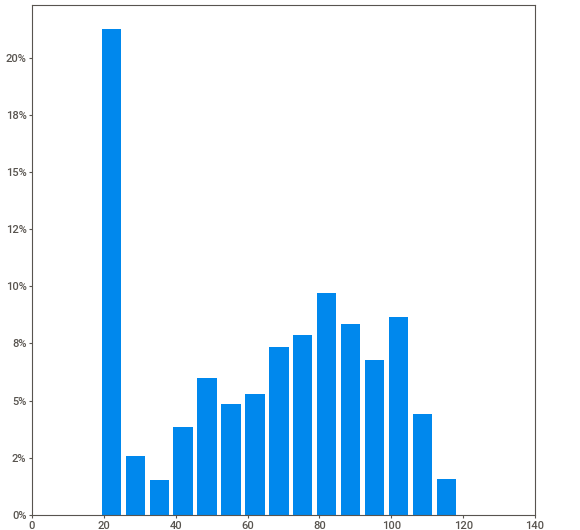
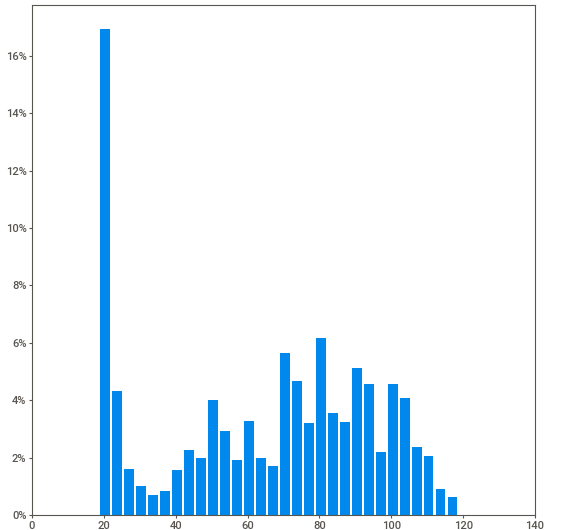
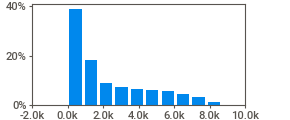
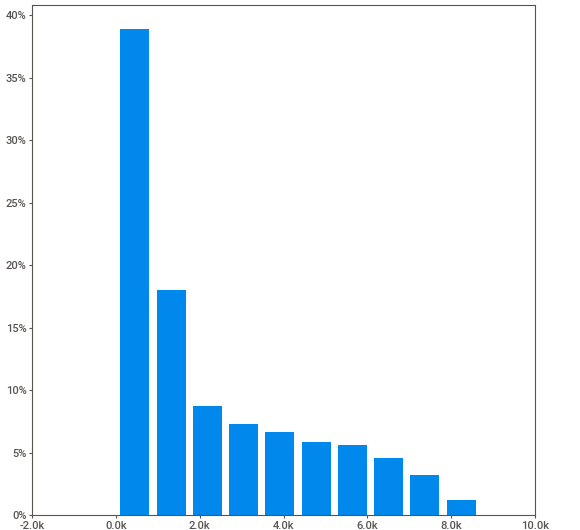
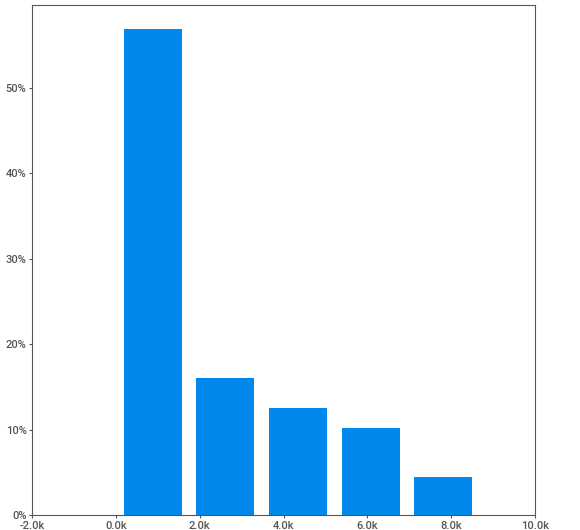
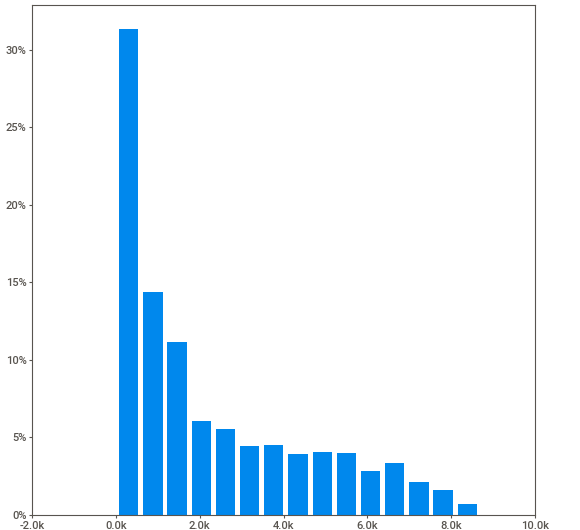
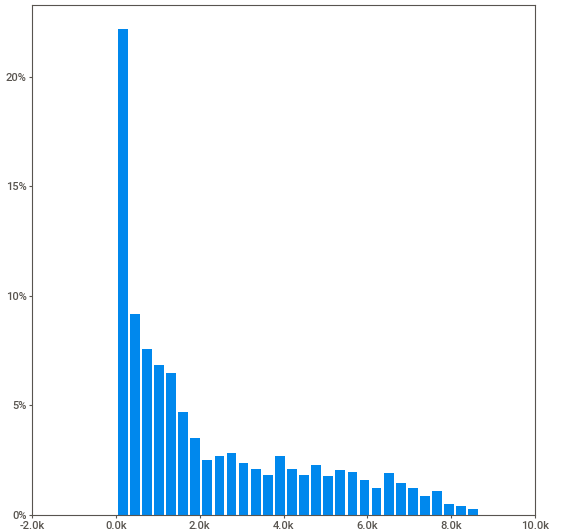
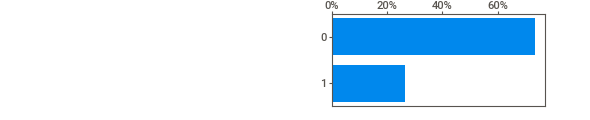
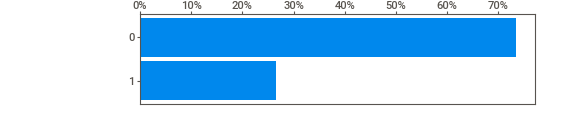
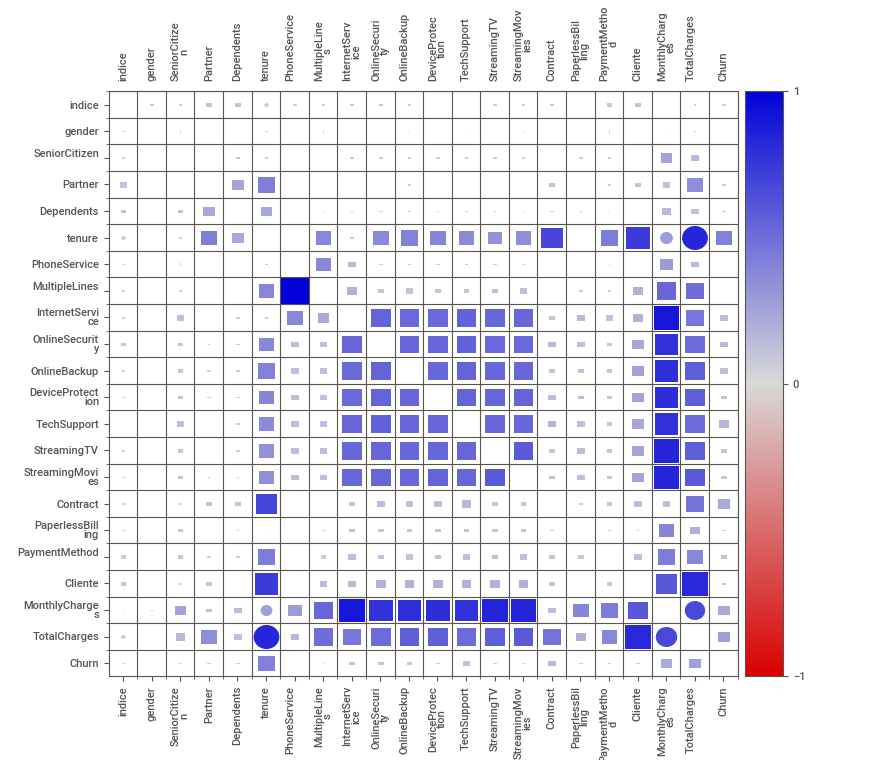
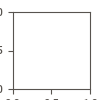

In [ ]:
relatorio.show_notebook()

* Nesse momento vamos  estudar apenas as variáveis numéricas, em um outro momento pretendo comparar com outro modelo incluindo todas ou a maioria das categóricas.

# Análise Gráfica

* À pouco tempo estudei sobre uma ferramenta gráfica muito interessante "Plotly", vamos usar ela para esse estudo.

In [ ]:
# habilita modo offline do plotly
from plotly.offline import plot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Definindo o renderizador, pois em alguns casos podem acontecer do gráfico não ser exibido.
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
# importando os módulos para visualização
import plotly.express as px
from IPython.display import HTML
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in treino_final.Cliente:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = treino_final['tenure'],
                   y = treino_final['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Cliente')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

* O interessante aqui é a interação com o gráfico, pois ao posicionar o mouse sobre o ponto de interesse, já conseguimos visualizar o valor de tenure e TotalCharges.
* podemos ver de uma forma bem evidente que a classe 'normal' e 'premium' estão muito bem dividas, isso irá nos dará uma maior precisão durante a modelagem.
* Ao realizar um zoom  entre 50 e 72, podemos rapidamente identificar que, para tenure 71, temos dois clientes classificados como Premium que estão com TotalCharges abaixo de 1500 e ainda temos alguns clientes 'Normal' com valores acima de 1500. Basicamente esses podem alguns resquicios por causa do merge.

**Conclusão**: O merge teve um efeito muito positivo, mas todavia, não foi possível obter os dados totalmente homólogo, visto que tivemos várias combinações repetidas que acabaram por trazer valores distintos para totalcharges. 

In [ ]:
# Plotando um gráfico de boxplot com apenas uma linha!
px.box(treino_final, x='tenure', y='TotalCharges', color= cores)

* Com apenas uma linha de código conseguimos plotar esse gráfico de boxplot interativo com as informações dos quartis e outliers separado por classe.
* Com esse gráfico facilmente podemos identificar que para 'tenure' = 61 existem  clientes 'Normal' que estão com 'TotalCharges' acima de 1500 nesse caso eles estão com a máxima de 1551.6, talvez seja interessante tratar esses dados em específico ou removê-los da base. Mas isso iremos deixar para um outro momento.

# Técnica de Validação HOLDOUT

In [ ]:
# modelo Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
#Separando o conjunto
X= treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]
y= treino_final['Cliente']

In [ ]:
#separando o consjunto para treino e teste. 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
#variável que irá instanciar o modelo
clf = svm.SVC(C=1.0)

In [ ]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Acurácia
clf.score(X_test,y_test)

0.9893333333333333

In [ ]:
#importe para criar um report das métricas.
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, target_names=['normal','premium']))
#o modelo até que se saiu bem para o conjunto teste vamos comparar as métricas.

              precision    recall  f1-score   support

      normal       0.98      1.00      0.99       400
     premium       1.00      0.98      0.99       350

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [ ]:
# Vamos verificar no conjunto inteiro
y_pred = clf.predict(X)

In [ ]:
clf.score(X,y)
#Esta com um score parecido com o conjunto todo.

0.9904

In [ ]:
# vamos realizar a predição com o conjunto teste e salvar o resultado
teste_pred = teste[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]

In [ ]:
pred_clf = clf.predict(teste_pred)

In [ ]:
subm = pd.DataFrame()

In [ ]:
subm['Cliente'] = pred_clf

In [ ]:
subm.to_csv('clf.csv', index=False)

* Esse modelo está com um bom resultado, podemos estudar ele mais p. frente, por hora vamos continuar o estudo por outros métodos.
!PENDENTE DE VERIFICAÇÃO!

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



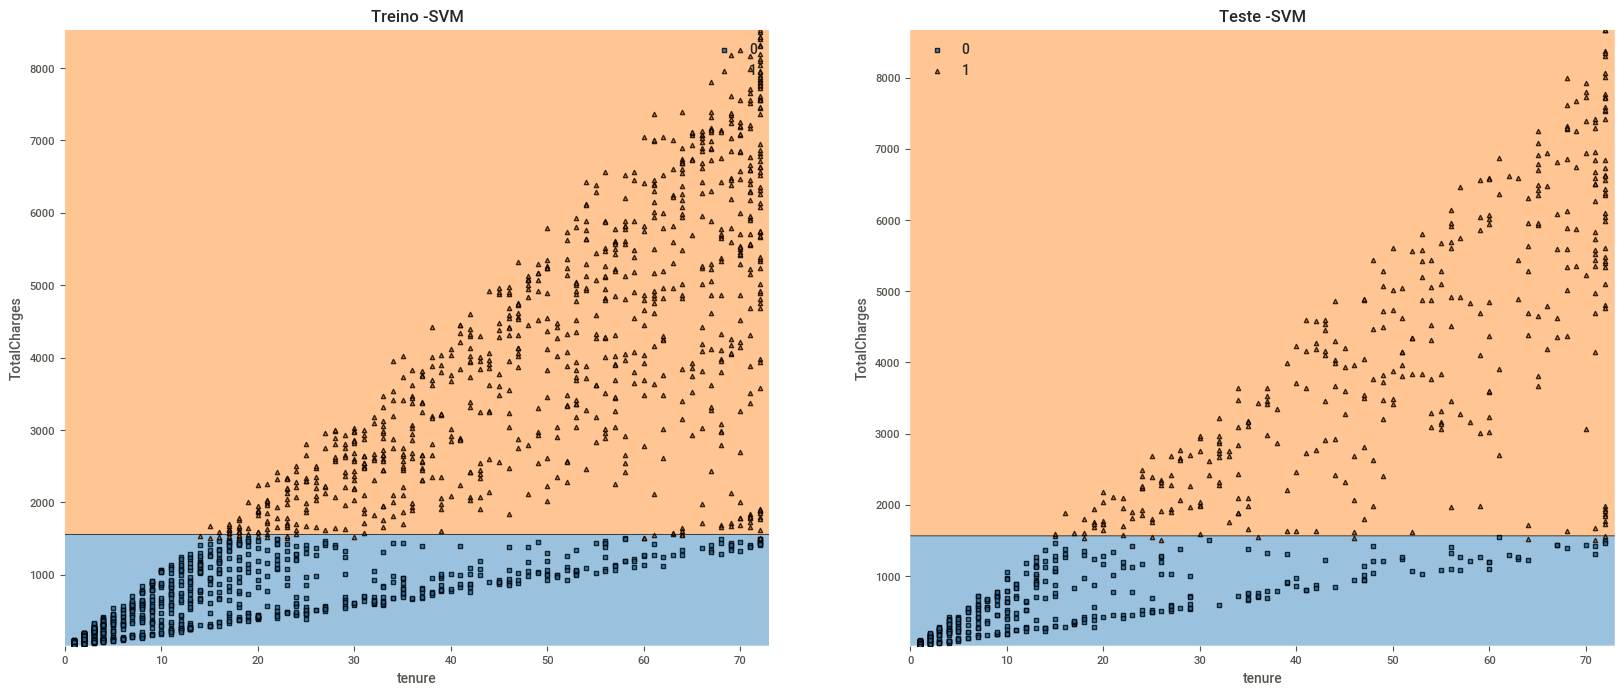

In [ ]:
# Região de decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.3)
clf.fit(Xtreino, ytreino)
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf= clf, legend= 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino -SVM')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = clf, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste -SVM')
plt.show()

# Técnica de validação cruzada K-Fold

##Regressão logística

In [ ]:
#Configuração da Validação Cruzada com regressão logística
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
# Validação com 10 folds, shuffle é para desabilitar a semente.
kfold = KFold(n_splits= 10, shuffle= True)

In [ ]:
#Carregamento do modelo e separação das variáveis do nosso conjunto.
from sklearn.linear_model import LogisticRegression
X= treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]
y= treino_final['Cliente']
modelo = LogisticRegression()

In [ ]:
# validação cruzada com 10 folds
reglog = cross_validate(modelo, X, y, cv = kfold, scoring=['accuracy','recall','precision','f1'] )

In [ ]:
# a variável armazena um dicionário com os 10 resultados.
reglog

{'fit_time': array([0.08493137, 0.05029559, 0.05178928, 0.05224228, 0.05018425,
        0.0582037 , 0.05180573, 0.05173826, 0.04909396, 0.06168056]),
 'score_time': array([0.00915456, 0.0057373 , 0.00623274, 0.00581694, 0.00575876,
        0.00601745, 0.00654745, 0.00587702, 0.00631785, 0.00679731]),
 'test_accuracy': array([1.   , 0.996, 1.   , 0.988, 0.988, 0.996, 0.996, 1.   , 0.996,
        0.992]),
 'test_f1': array([1.        , 0.99616858, 1.        , 0.98712446, 0.98604651,
        0.99578059, 0.99588477, 1.        , 0.99588477, 0.99038462]),
 'test_precision': array([1.        , 1.        , 1.        , 1.        , 0.97247706,
        1.        , 1.        , 1.        , 1.        , 0.98095238]),
 'test_recall': array([1.        , 0.99236641, 1.        , 0.97457627, 1.        ,
        0.99159664, 0.99180328, 1.        , 0.99180328, 1.        ])}

In [ ]:
# imprimindo as TotalCharges referentes à cada métrica aplicada, arredondada por 4 dígitos.
print(' Acurácia:', round(reglog['test_accuracy'].mean(),4))
print(' Precisão:', round(reglog['test_precision'].mean(),4))
print(' Sensibilidade:', round(reglog['test_recall'].mean(),4))
print(' F1:', round(reglog['test_f1'].mean(),4))
# o modelo performou bem com 10 folds.

 Acurácia: 0.9952
 Precisão: 0.9953
 Sensibilidade: 0.9942
 F1: 0.9947


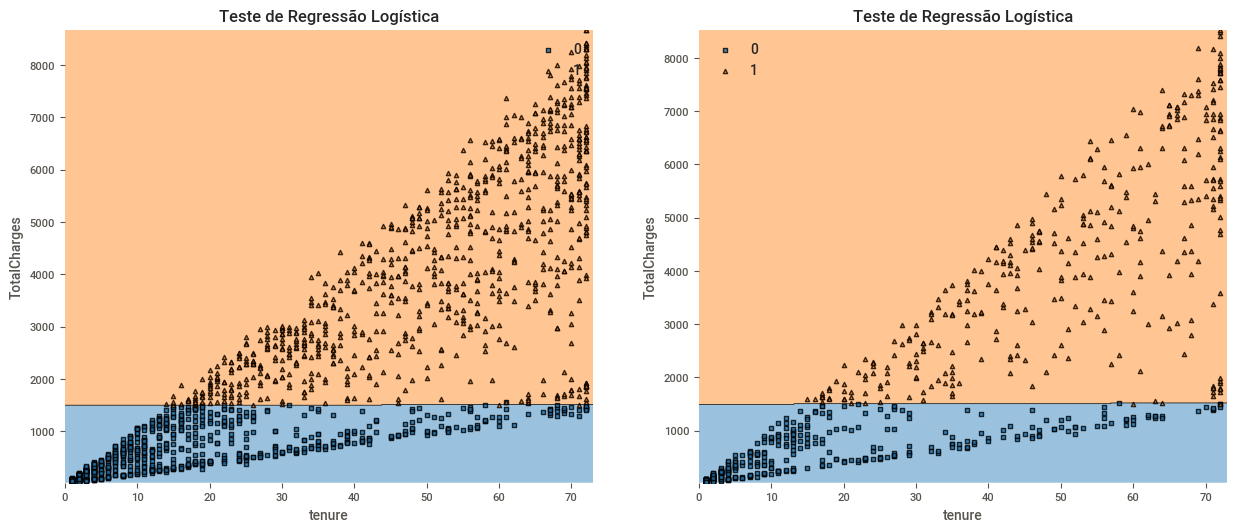

In [ ]:
# Região de decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.3)
modelo.fit(Xtreino, ytreino)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf= modelo, legend= 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste de Regressão Logística')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste de Regressão Logística')
plt.show()

## KNN

In [ ]:
#Validação cruzada kfold com KNN
from sklearn.neighbors import KNeighborsClassifier
X= treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]
y= treino_final['Cliente']
k = 11
modelo = KNeighborsClassifier(n_neighbors= k)
reglog = cross_validate(modelo, X, y, cv= kfold, scoring=['accuracy','recall','precision','f1'])

print(' Acurácia:', round(reglog['test_accuracy'].mean(),4))
print(' Precisão:', round(reglog['test_precision'].mean(),4))
print(' Sensibilidade:', round(reglog['test_recall'].mean(),4))
print(' F1:', round(reglog['test_f1'].mean(),4))

 Acurácia: 0.9968
 Precisão: 0.9975
 Sensibilidade: 0.9957
 F1: 0.9966


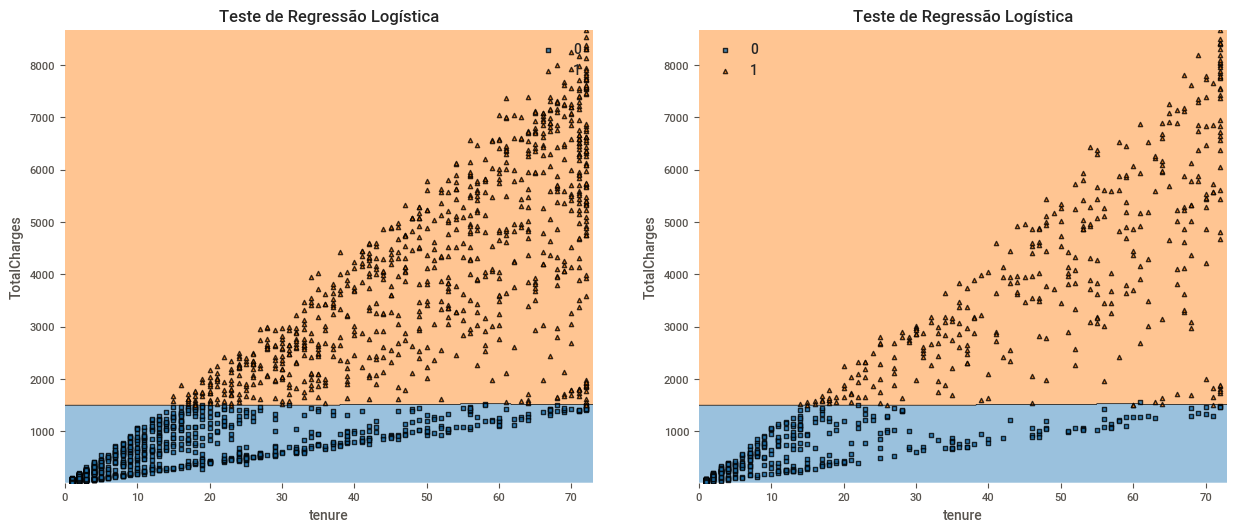

In [ ]:
# Região de decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.3)
modelo.fit(Xtreino, ytreino)
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf= modelo, legend= 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste de Regressão Logística')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste de Regressão Logística')
plt.show()

## Árvore de Decisão

In [ ]:
#Validação cruzada kfold com árvore de decisão
from sklearn.tree import DecisionTreeClassifier
X= treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]
y= treino_final['Cliente']
profundidade = 5
modelo = DecisionTreeClassifier(max_depth= profundidade)
reglog = cross_validate(modelo, X, y, cv= kfold, scoring=['accuracy','recall','precision','f1'])

print(' Acurácia:', round(reglog['test_accuracy'].mean(),4))
print(' Precisão:', round(reglog['test_precision'].mean(),4))
print(' Sensibilidade:', round(reglog['test_recall'].mean(),4))
print(' F1:', round(reglog['test_f1'].mean(),4))

 Acurácia: 0.9984
 Precisão: 0.9984
 Sensibilidade: 0.9983
 F1: 0.9984


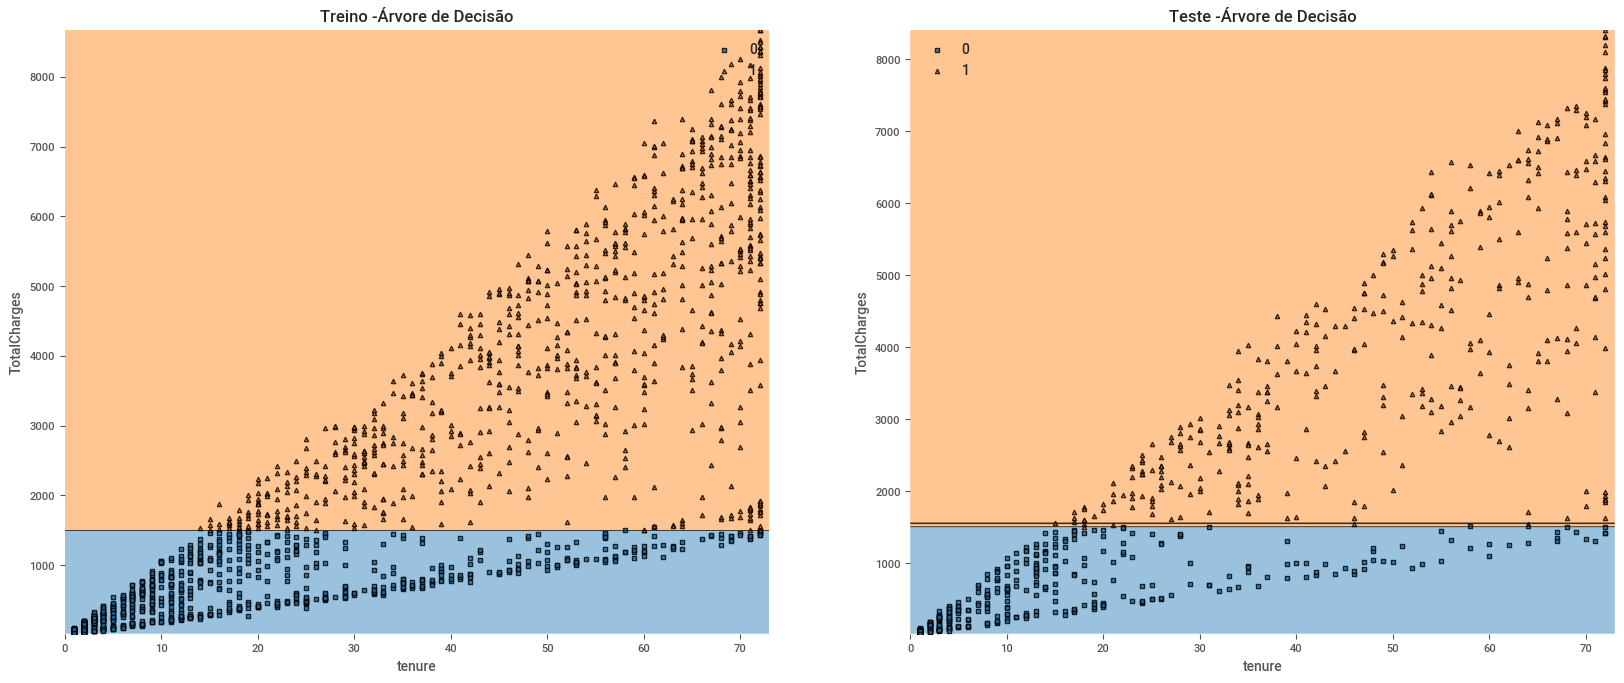

In [ ]:
# Região de decisão

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']
Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.3)
modelo.fit(Xtreino, ytreino)
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf= modelo, legend= 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino -Árvore de Decisão')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste -Árvore de Decisão')
plt.show()

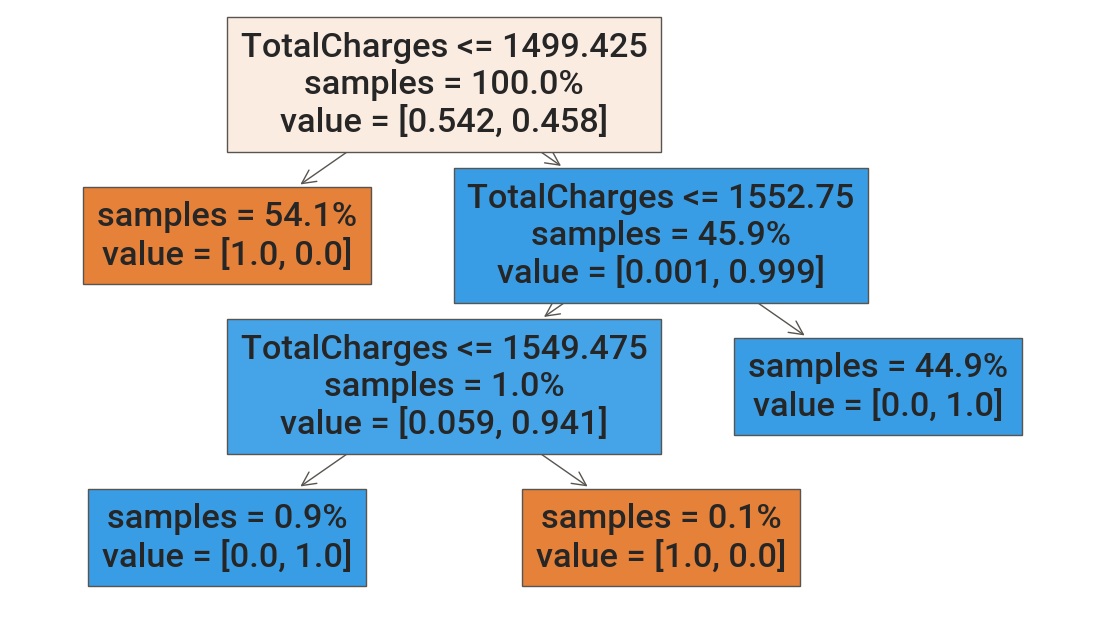

In [ ]:
#plot da árvore
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))
plot_tree(modelo, filled= True, proportion= True, impurity= False, feature_names=X.columns)
plt.show()

Modelo para árvore de decisão performou bem, vamos realizar um estudo agora com todos os modelos.

# Técnica de Validação Cruzada K-Fold com vários modelos

In [ ]:
#Comparação de vários modelos com alguns parãmetros diferentes.
X= treino_final[['tenure','TotalCharges','SeniorCitizen','MonthlyCharges','Churn']]
y= treino_final['Cliente']
modelos = [LogisticRegression(max_iter=200),
           KNeighborsClassifier(n_neighbors= 10),
           KNeighborsClassifier(n_neighbors= 11),
           KNeighborsClassifier(n_neighbors= 12),
           DecisionTreeClassifier(max_depth=3),
           DecisionTreeClassifier(max_depth=4),
           DecisionTreeClassifier(max_depth=5)]
nomes= ['Regressão Logística',
        'KNN - K=10',
        'KNN - K=11',
        'KNN - K=12',
        'Árvore - Prof=3',
        'Árvore - Prof=4',
        'Árvore - Prof=5']
accs = []
sens = []
vpps = []
f1 = []

for modelo in modelos:
  resultados = cross_validate(modelo, X, y, cv= kfold, scoring = ['accuracy', 'recall', 'precision', 'f1'])
  accs.append(resultados['test_accuracy'].mean())
  vpps.append(resultados['test_precision'].mean())
  sens.append(resultados['test_recall'].mean())
  f1.append(resultados['test_f1'].mean())
aux= {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps, 'F1': f1}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by= 'F1', ascending= False).round(4)

Acurácia  Sensibilidade  Precisão      F1
Árvore - Prof=3        0.9992         1.0000    0.9984  0.9992
Árvore - Prof=4        0.9988         0.9991    0.9984  0.9987
Árvore - Prof=5        0.9988         0.9992    0.9982  0.9987
KNN - K=10             0.9976         0.9959    0.9992  0.9975
KNN - K=11             0.9972         0.9967    0.9975  0.9970
Regressão Logística    0.9972         0.9963    0.9974  0.9969
KNN - K=12             0.9968         0.9951    0.9984  0.9967

# Técnica de Validação: K-FOLD REPETIDO

In [ ]:
# Configuração da Validação Cruzada com kfold repetido

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

validacao = RepeatedKFold(n_splits = 10, n_repeats = 10)

##Regressão Logística

In [ ]:
# Regressão Logistica

modelo = LogisticRegression(max_iter=200) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9968626292084743

##KNN

In [ ]:
# KNN

modelo = KNeighborsClassifier(n_neighbors = 25) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9964229077153195

##Árvore de Decisão

In [ ]:
# Árvore de Decisão

modelo = DecisionTreeClassifier(max_depth = 3) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9986840479281269

## Combinação por votos 'Hard'

In [ ]:
# Combinação por votos 'Hard'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors = 11)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'hard')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9975838494625754

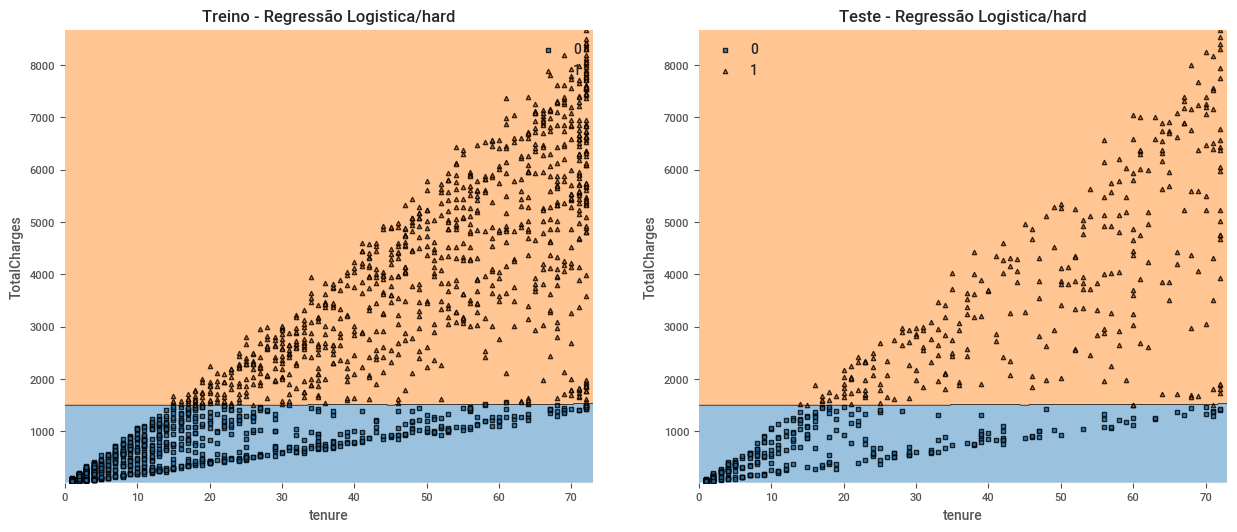

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino - Regressão Logistica/hard')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste - Regressão Logistica/hard')
plt.show()  

plt.show()

## Combinação por votos 'Soft'

In [ ]:
# Combinação por votos 'Soft'

from sklearn.ensemble import VotingClassifier
 
reglog = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 25)
arvore = DecisionTreeClassifier(max_depth = 3)

modelos = [('Reg. Log.', reglog), ('KNN', knn), ('Árvore', arvore)]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9991150523279829

In [ ]:
modelo.fit(X,y)

VotingClassifier(estimators=[('Reg. Log.',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkow...
                              DecisionTreeC

In [ ]:
X = treino_final[['tenure','TotalCharges']]

In [ ]:
pred_treino = modelo.predict(X)

In [ ]:
t1 = pd.DataFrame()
t1['pred'] = pred_treino

In [ ]:
# Até agora nenhum modelo acertou todos, e aparentemente esse será o nosso melhor resultado.
(treino_final['Cliente'] != t1['pred']).sum()

2

In [ ]:
X_teste_combsoft = teste[['tenure','TotalCharges']]

In [ ]:
X_teste_combsoft['Cliente'] = modelo.predict(X_teste_combsoft)

In [ ]:
X_teste_combsoft.Cliente.to_csv('comb_soft_vot.csv', index=False)

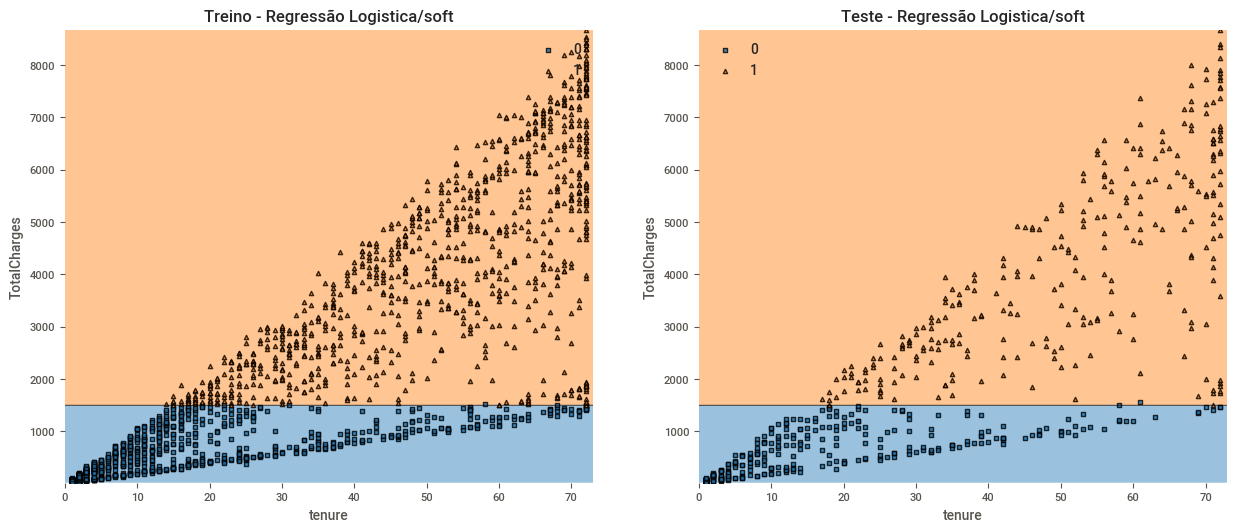

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino - Regressão Logistica/soft')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste - Regressão Logistica/soft')
plt.show()  

plt.show()

* Até aqui a maioria dos modelos se saem muito bem, usando apenas tenure e TotalCharges para predição é mais do que o suficiente, pois com todas as variáveis o resultado está sendo o mesmo. Estamos errando 2 no conjunto treino e acho que esse dois foram classificados errado durante o merge. O problema é que o mesmo deve estar ocorrendo no conjunto teste e esse não vamos conseguir identificar.

## Bagging

In [ ]:
X= treino_final[['tenure','TotalCharges']]
y= treino_final['Cliente']

In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier

#modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 11)
modelo_base = DecisionTreeClassifier(max_depth = 3)

modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base) 
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.998748065059951

In [ ]:
modelo.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [ ]:
pred_treino = modelo.predict(X)

In [ ]:
t1 = pd.DataFrame()
t1['pred'] = pred_treino

In [ ]:
# Até agora nenhum modelo acertou todos, e aparentemente esse será o nosso melhor resultado.
(treino_final['Cliente'] != t1['pred']).sum()

2

* Mesmo caso, não conseguimos acertar esse dois, acredito que sejam os mesmo para todos os modelos, temos que analisar  esse erro. Por hora vamos salvar a previsão.

In [ ]:
bagging = teste[['tenure','TotalCharges']]

In [ ]:
bagging['Cliente'] = modelo.predict(bagging)

In [ ]:
bagging.Cliente.to_csv('bagging.csv', index=False)

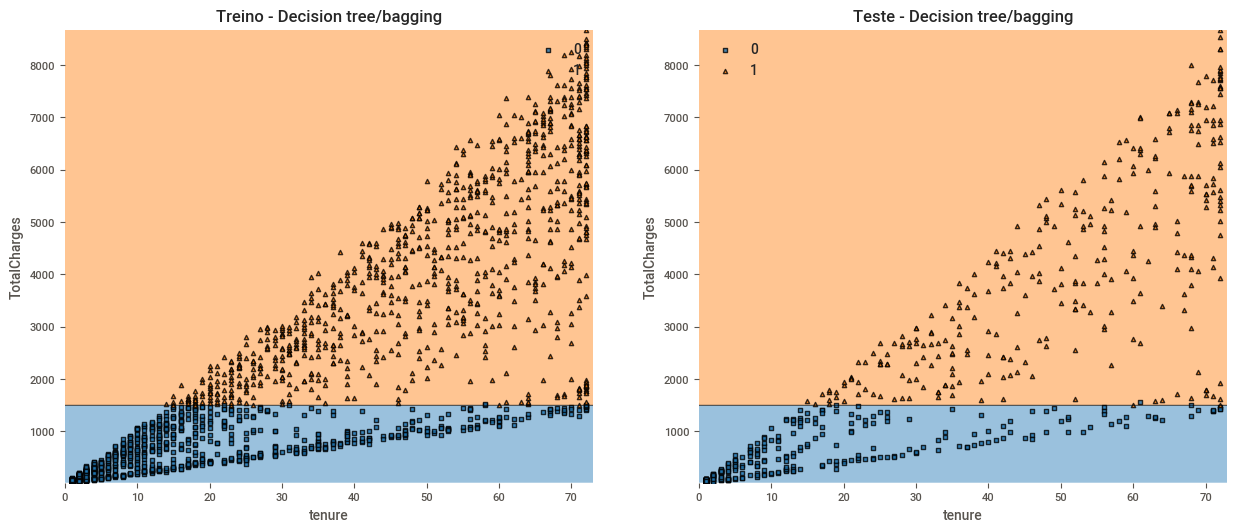

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino - Decision tree/bagging')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste - Decision tree/bagging')
plt.show()  

plt.show()

##RandomForestClassifier

In [ ]:
#Validação cruzada com kfold repetido para RandomForest
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 100, max_depth = 5)
medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'f1')
medidas['test_score'].mean()

0.9988395216608152

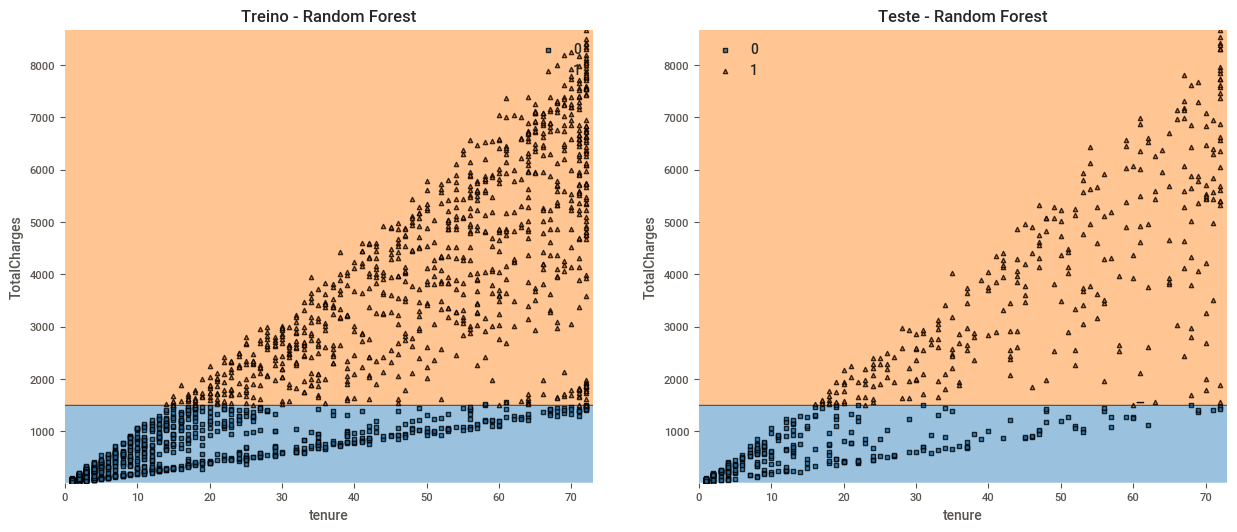

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = treino_final[['tenure','TotalCharges']]
y = treino_final['Cliente']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Treino - Random Forest')

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend= 2)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('Teste - Random Forest')
plt.show()  

plt.show()

#Conclusão

* Conclusão, com base das variáveis adotadas para os modelos, podemos concluír que todos os modelos performaram muito bem, isso aparetemente nos mostra que o conjunto está bem classificado assim, como nos gráficos, aparenta estar fácil realizar a classificacão para todos os modelos que investimos nos testes, ou caímos no overfitting rs...

In [ ]:
#Instalando o Sweerviz para uma visualização rápida.
!pip install sweetviz -q

     |████████████████████████████████| 15.1 MB 175 kB/s 
     |████████████████████████████████| 76 kB 3.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


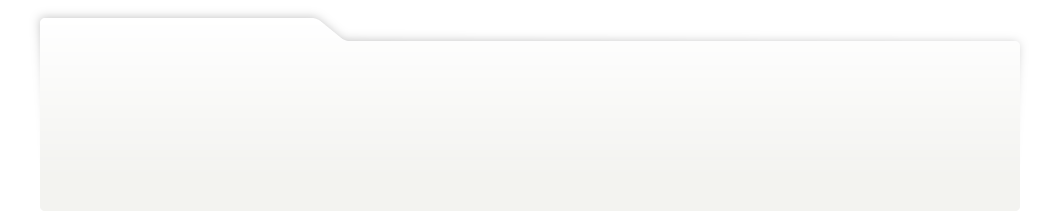
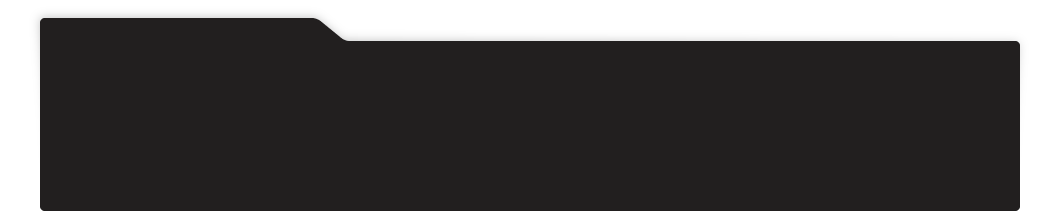
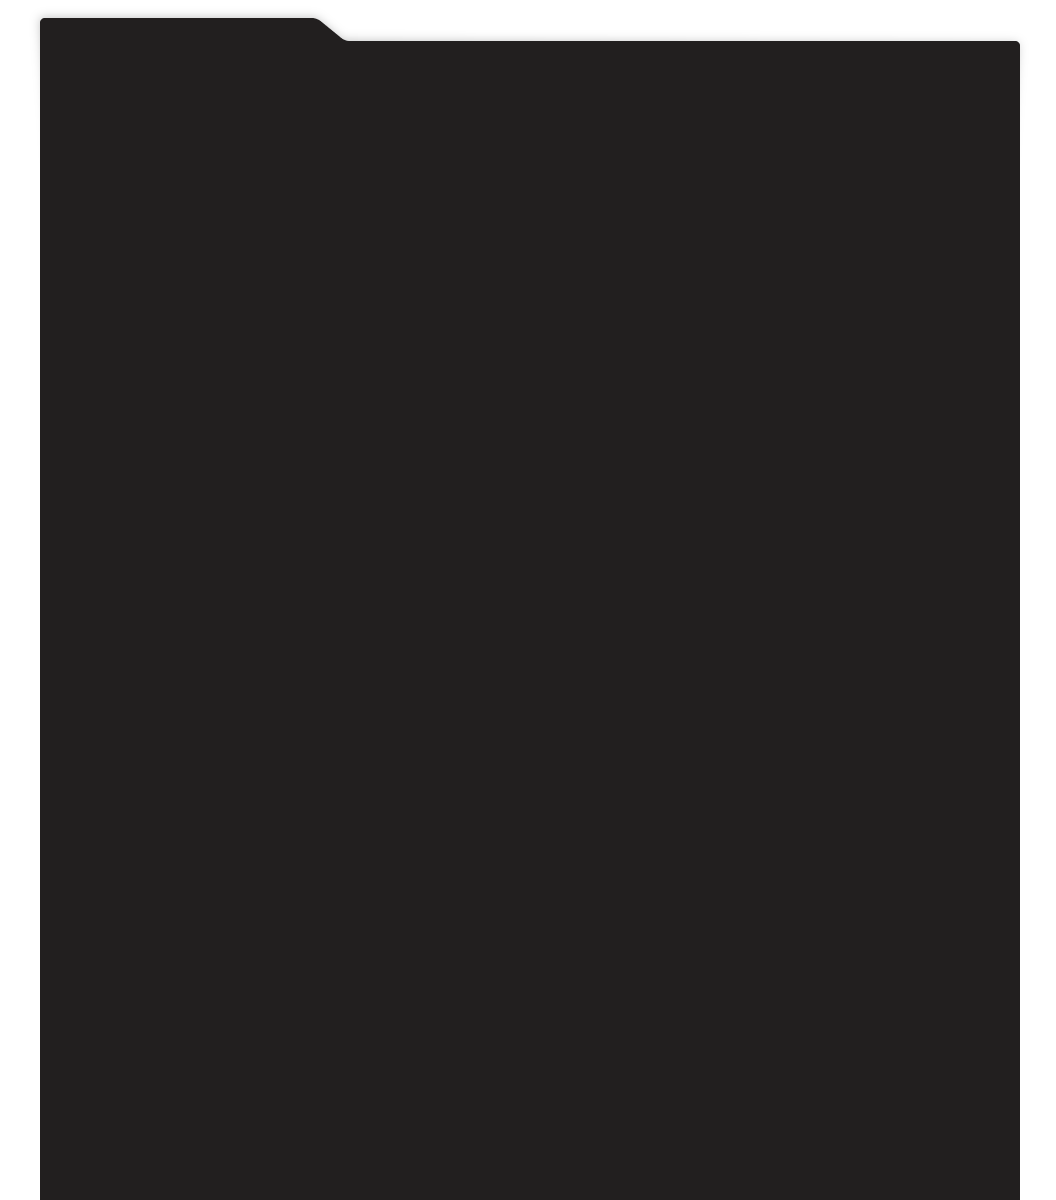
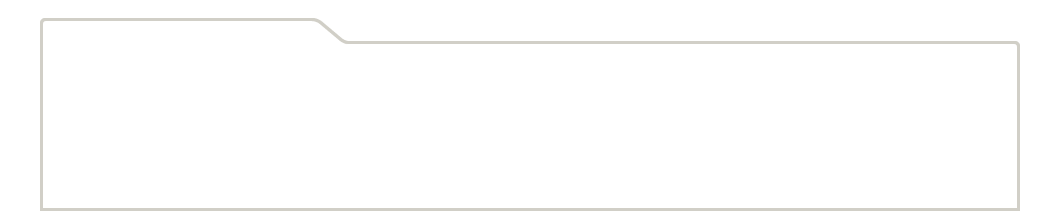
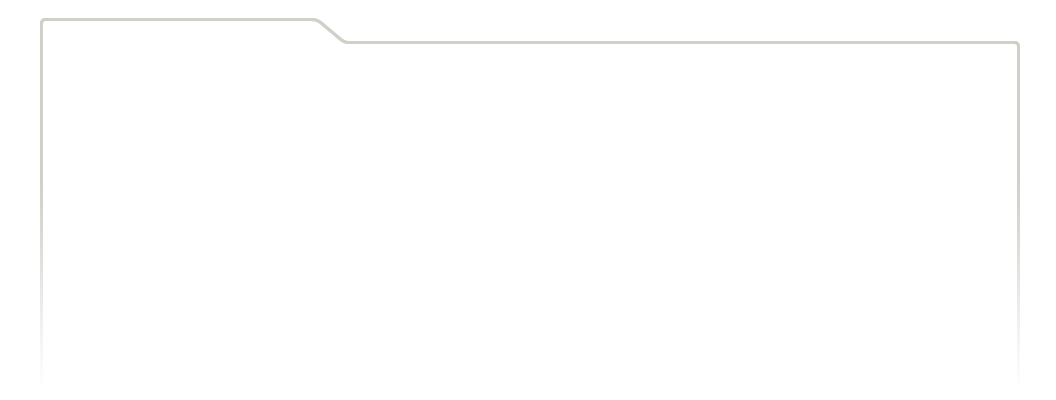
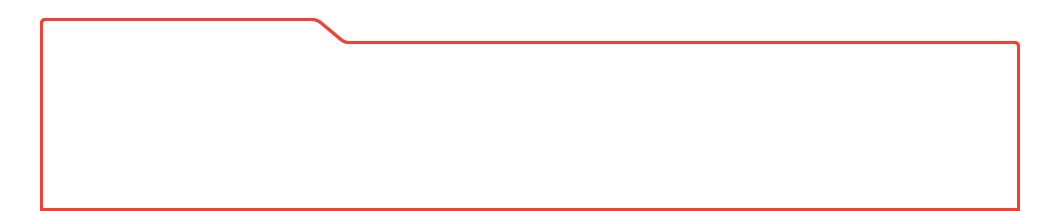
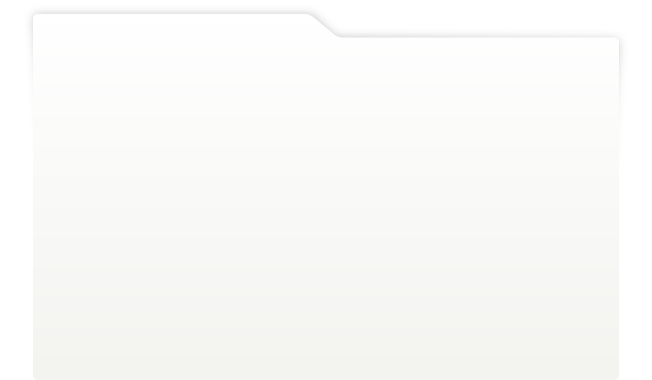
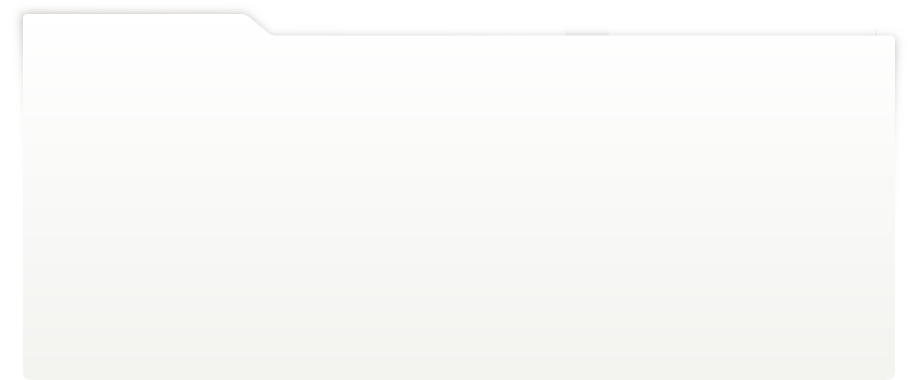
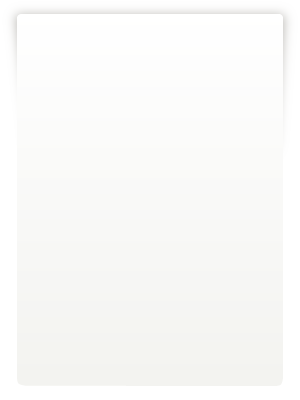
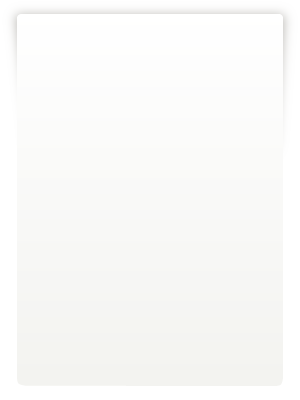
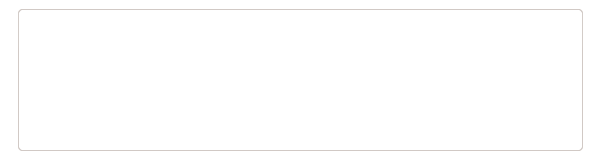
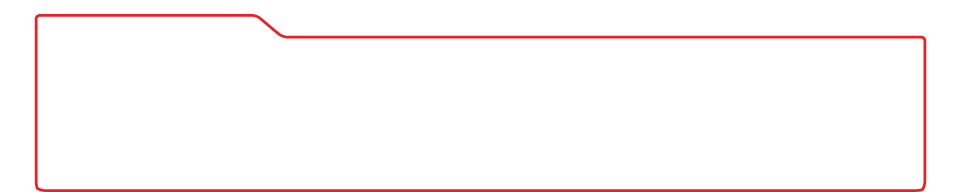
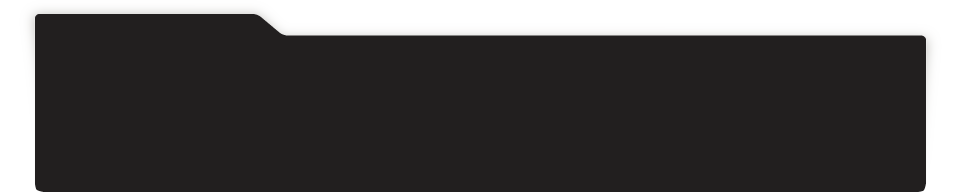
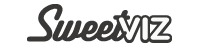
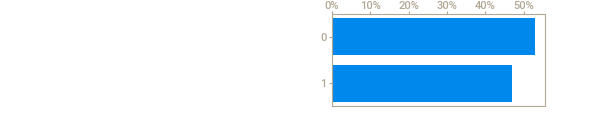
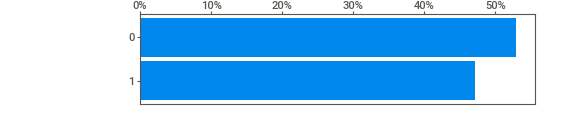
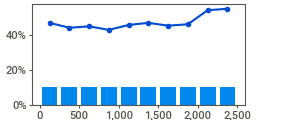
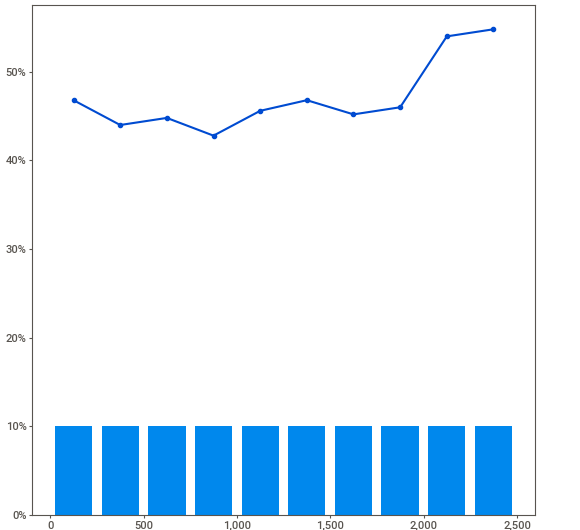
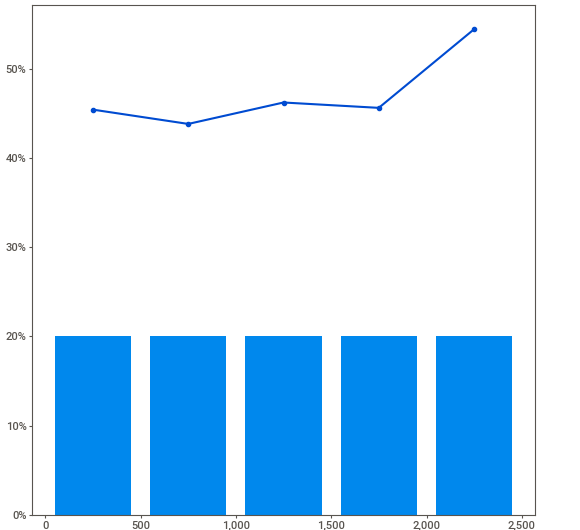
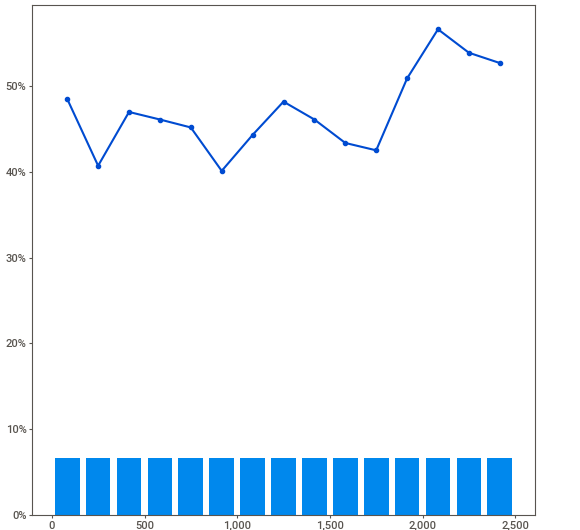
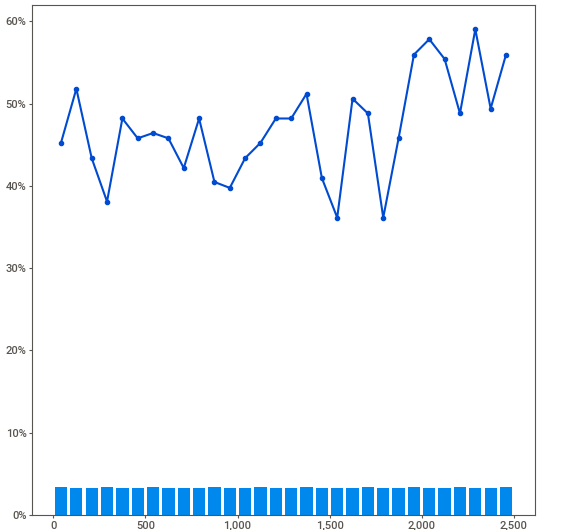
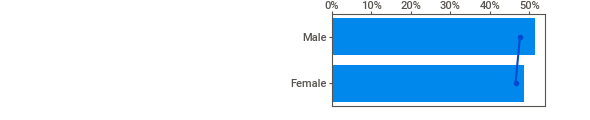
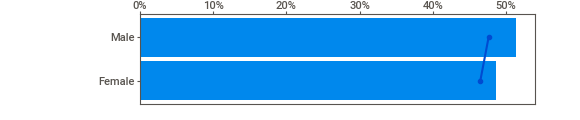
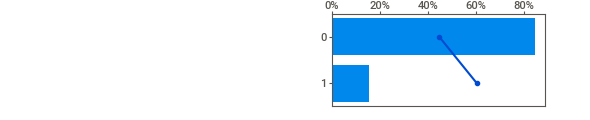
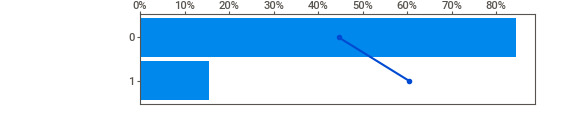
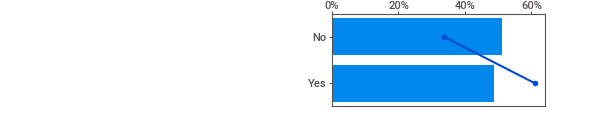
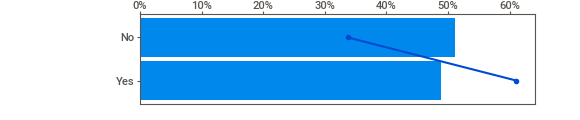
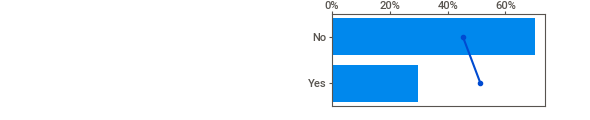
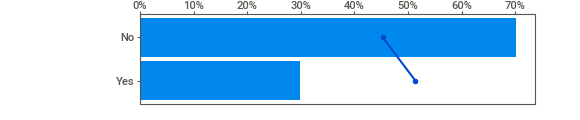
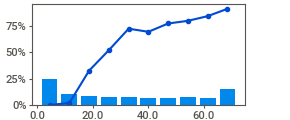
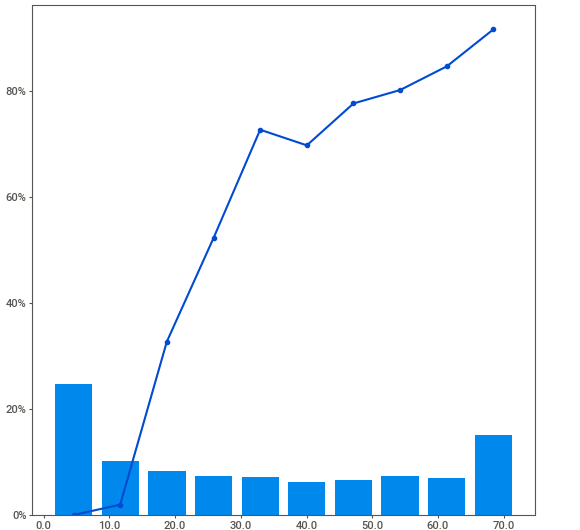
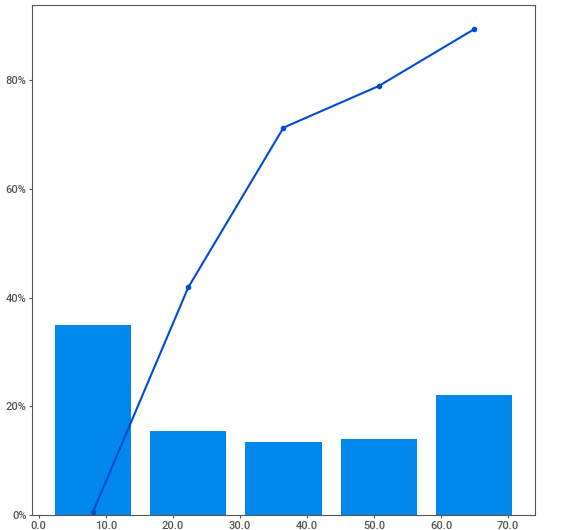
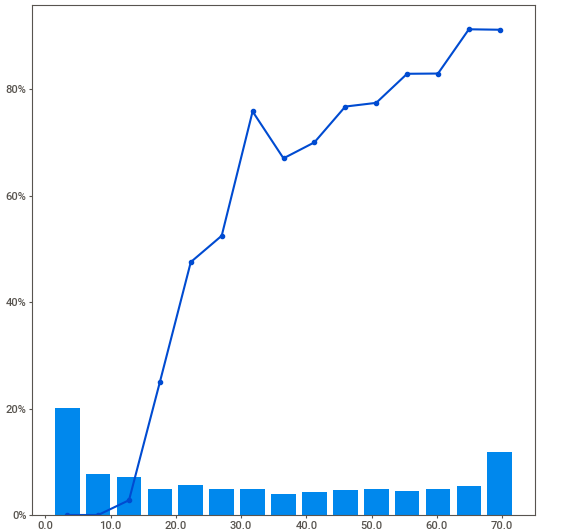
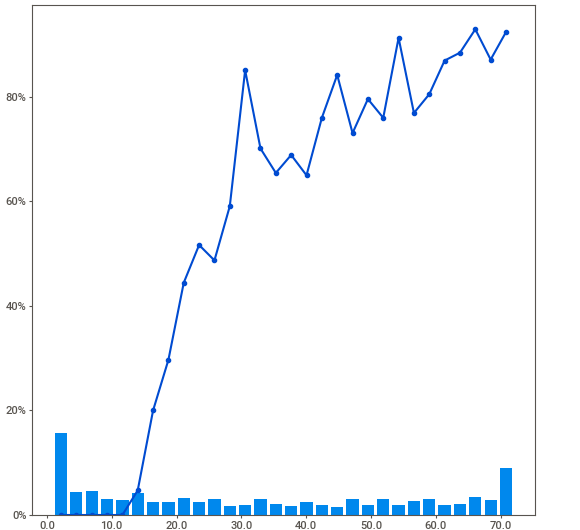
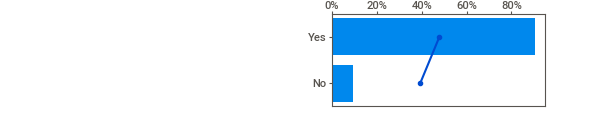
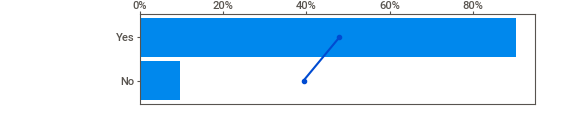
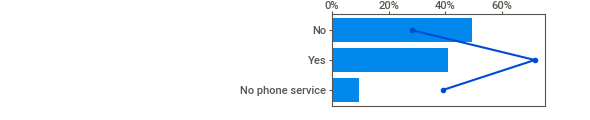
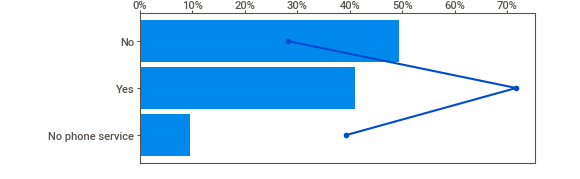
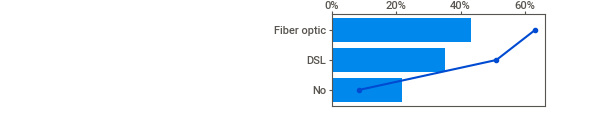
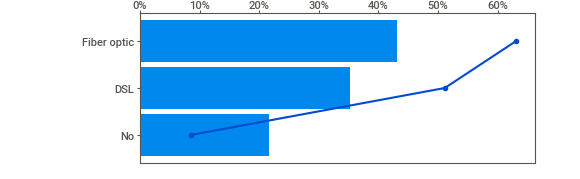
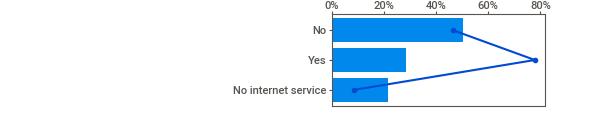
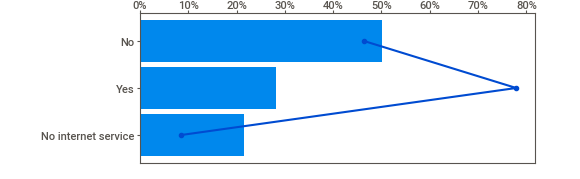
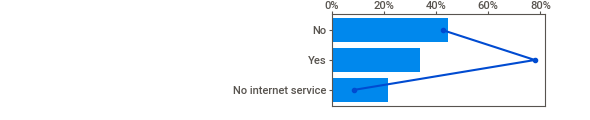
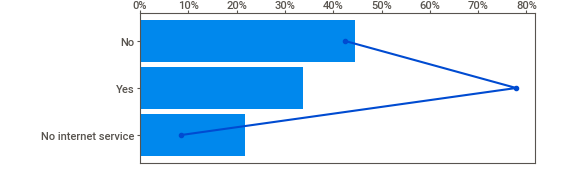
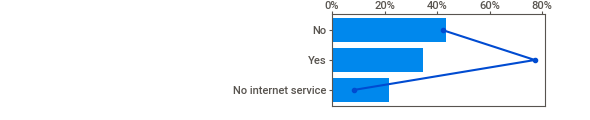
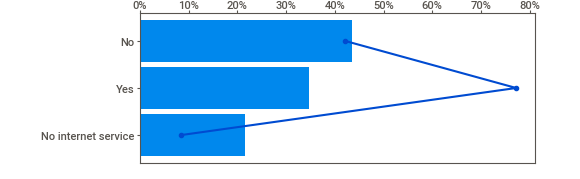
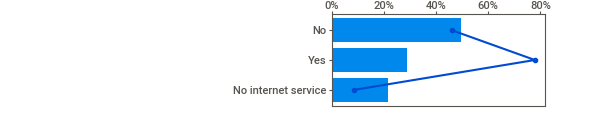
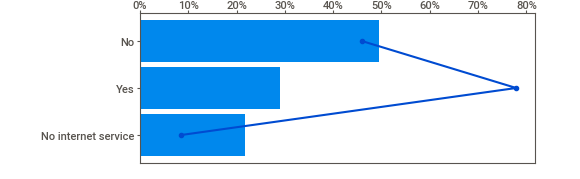
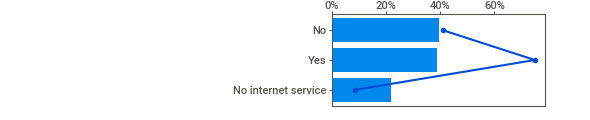
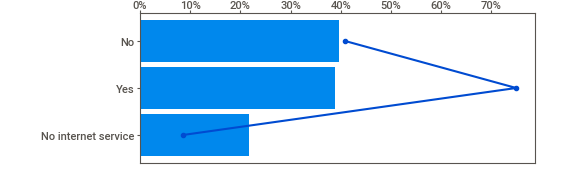
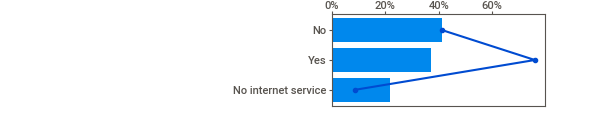
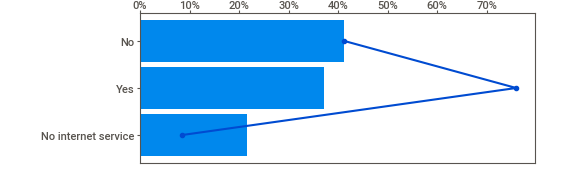
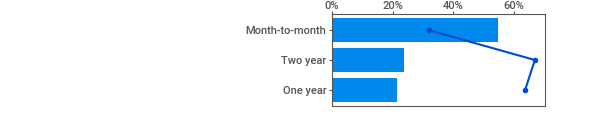
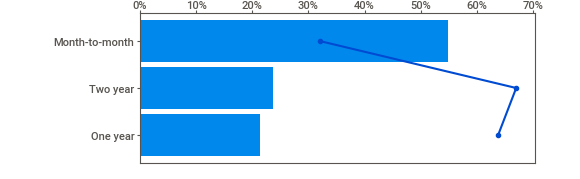
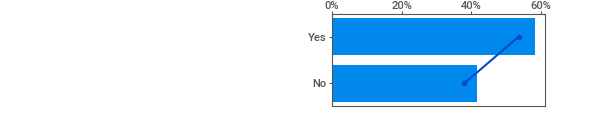
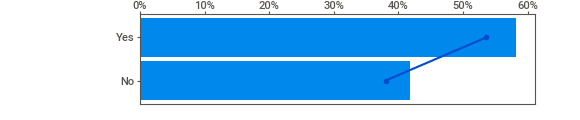
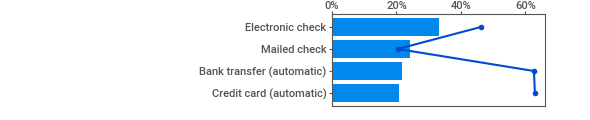
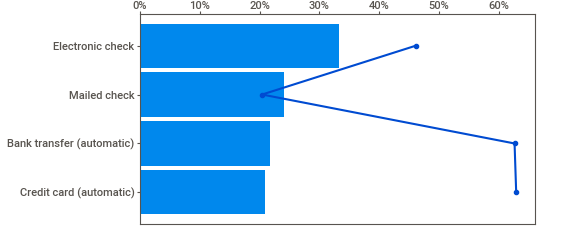
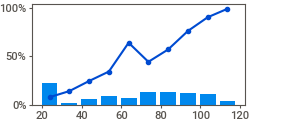
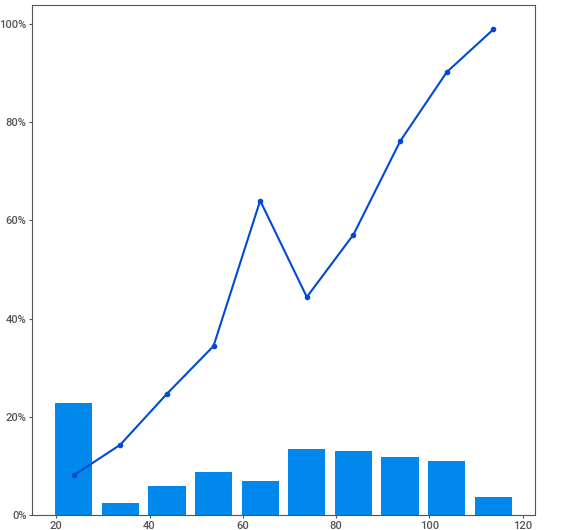
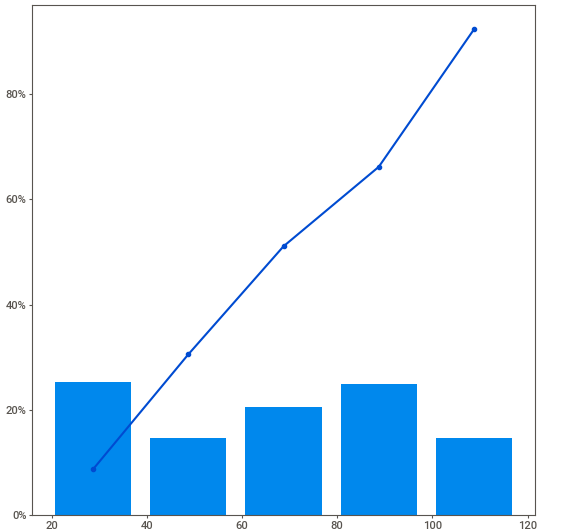
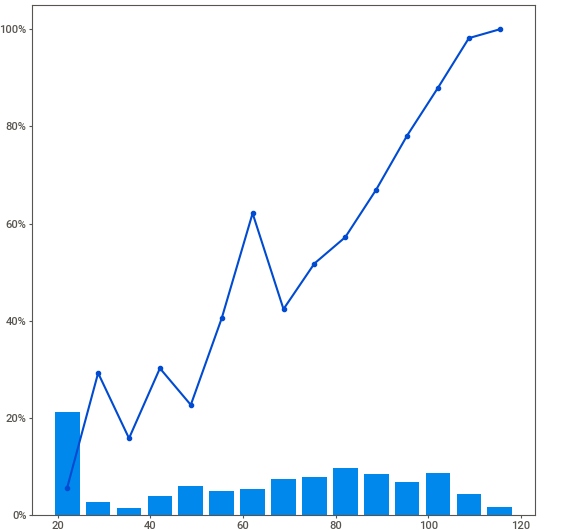
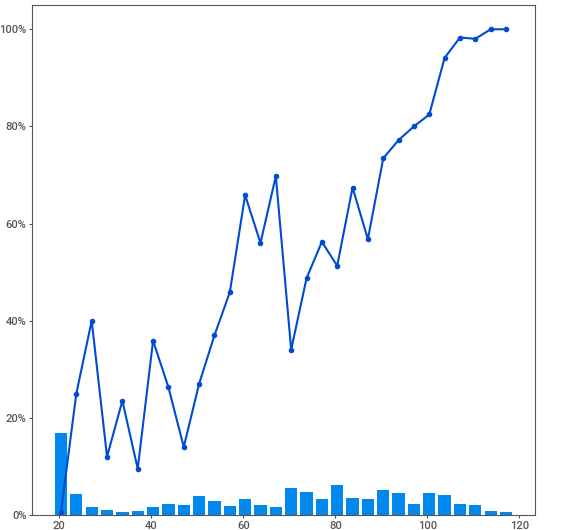
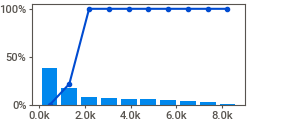
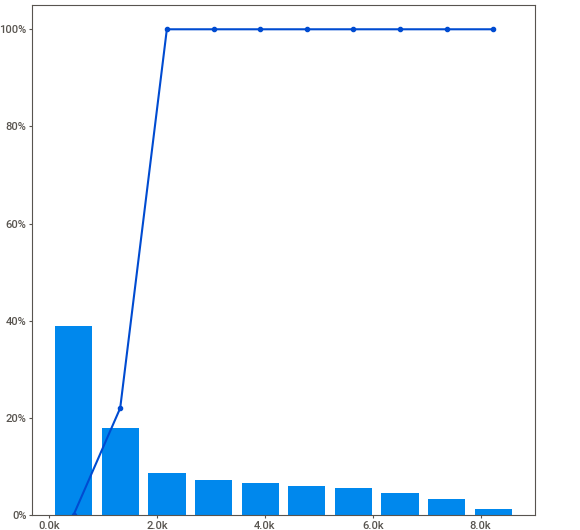
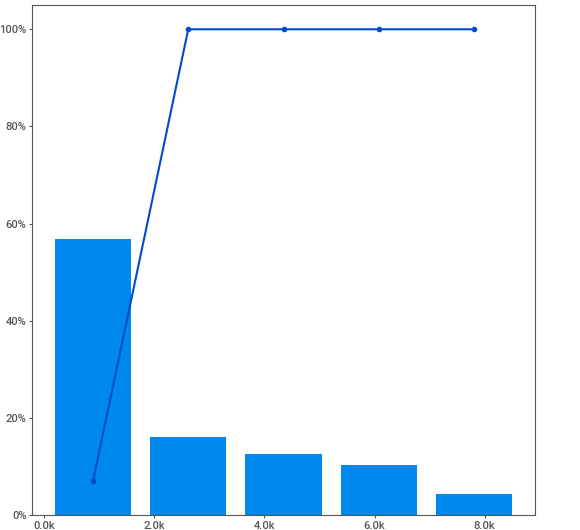
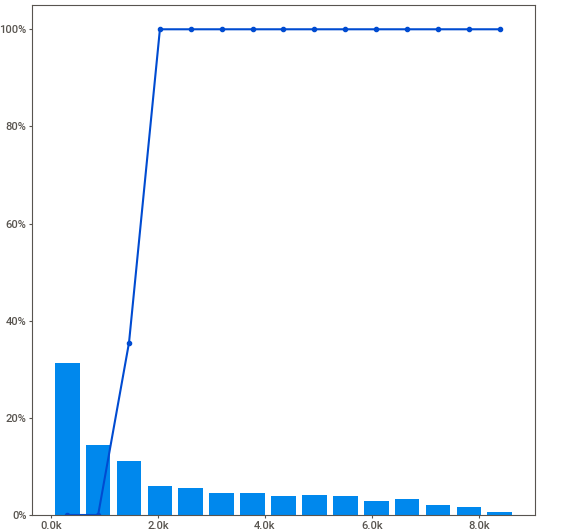
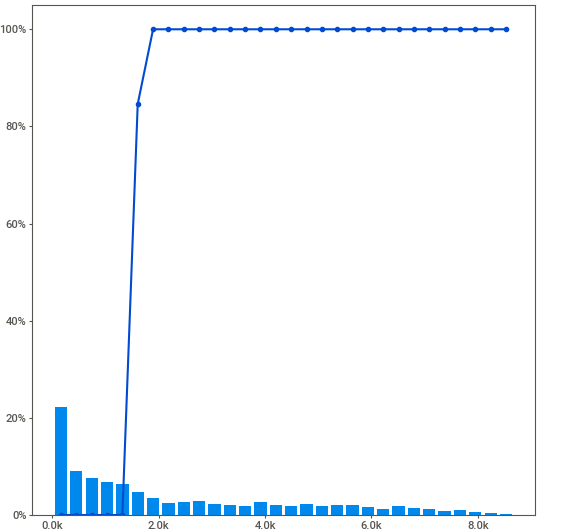
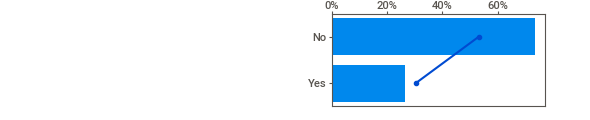
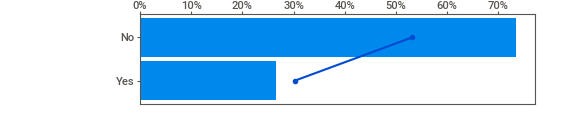
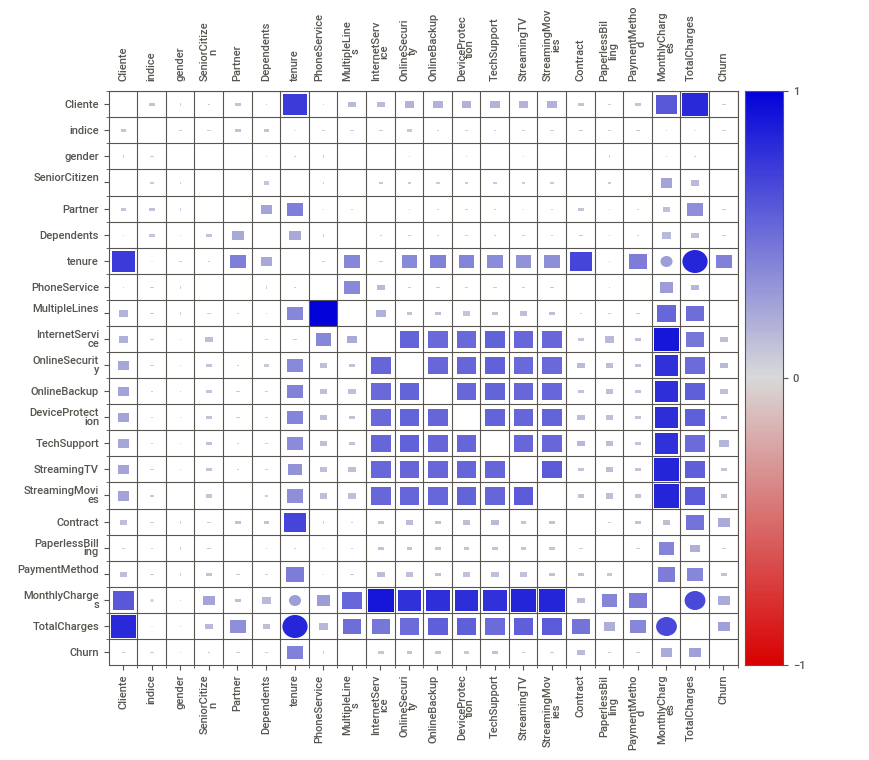
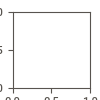

In [ ]:
#importando e criando nosso reporte do conjunto
import sweetviz as sv
eda = sv.analyze(source = treino_final, target_feat = 'Cliente')
eda.show_notebook()

In [ ]:
#Descarte das variáveis menos importantes!
treino_final.drop(['indice','customerID'], axis=1, inplace= True)

In [ ]:
treino_final.head()

gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0  Female              0      No  ...          19.70        406.95    No
1  Female              0     Yes  ...          65.50       3801.30    No
2  Female              0     Yes  ...          60.30       4109.00    No
3  Female              0      No  ...          50.15       1655.35    No
4    Male              1      No  ...          46.30         46.30    No

[5 rows x 21 columns]

#Auto ML com Pycaret

* Bom hoje vamos fazer alguns testes com o pycaret a fim de decidir qual será o melhor modelo(s) para a terceira submissão!

In [ ]:
#instalando o pycarte auto ml
!pip install pycaret

In [ ]:
#from pycaret.utils import enable_colab
from pycaret.classification import *

In [ ]:
#criando o setup com o dataset e nosso target
class_setup = setup(data = treino_final,
                    target = 'Cliente',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True,                    
                    multicollinearity_threshold = 0.95, n_jobs = -1)

# O pycaret so precisa de algumas informações ele detectou as variáveis categóricas, realizou a divisão  e a dummyficação etc...

Description             Value
0                               session_id              2059
1                                   Target           Cliente
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (2500, 21)
5                           Missing Values             False
6                         Numeric Features                 3
7                     Categorical Features                17
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (1749, 32)
12                    Transformed Test Set         (751, 32)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              140d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance              True
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold              0.95
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
models()

Name  ...  Turbo
ID                                         ...       
lr                    Logistic Regression  ...   True
knn                K Neighbors Classifier  ...   True
nb                            Naive Bayes  ...   True
dt               Decision Tree Classifier  ...   True
svm                   SVM - Linear Kernel  ...   True
rbfsvm                SVM - Radial Kernel  ...  False
gpc           Gaussian Process Classifier  ...  False
mlp                        MLP Classifier  ...  False
ridge                    Ridge Classifier  ...   True
rf               Random Forest Classifier  ...   True
qda       Quadratic Discriminant Analysis  ...   True
ada                  Ada Boost Classifier  ...   True
gbc          Gradient Boosting Classifier  ...   True
lda          Linear Discriminant Analysis  ...   True
et                 Extra Trees Classifier  ...   True
lightgbm  Light Gradient Boosting Machine  ...   True

[16 rows x 3 columns]

In [ ]:
# comparando todos os modelos.
todos = compare_models(n_select = 16, turbo = True)
# os modelos de validação com K-fold repetidos aparentemente performaram um pouco melhor vamos dar uma olhada no melhor modelo tunando os hiperparametros.

Model  Accuracy     AUC  Recall   Prec.  \
dt               Decision Tree Classifier    0.9977  0.9978  0.9988  0.9964   
rf               Random Forest Classifier    0.9977  0.9999  0.9988  0.9964   
gbc          Gradient Boosting Classifier    0.9966  0.9982  0.9964  0.9964   
ada                  Ada Boost Classifier    0.9960  1.0000  0.9952  0.9964   
lightgbm  Light Gradient Boosting Machine    0.9960  0.9999  0.9951  0.9964   
lr                    Logistic Regression    0.9828  0.9992  0.9770  0.9868   
et                 Extra Trees Classifier    0.9777  0.9973  0.9818  0.9717   
svm                   SVM - Linear Kernel    0.9771  0.0000  0.9685  0.9837   
lda          Linear Discriminant Analysis    0.9543  0.9961  0.9117  0.9910   
nb                            Naive Bayes    0.9520  0.9927  0.9528  0.9466   
ridge                    Ridge Classifier    0.9514  0.0000  0.9069  0.9897   
knn                K Neighbors Classifier    0.9451  0.9859  0.9213  0.9617   
qda       Quadratic Discriminant Analysis    0.5712  0.5760  0.6661  0.5426   

              F1   Kappa     MCC  TT (Sec)  
dt        0.9976  0.9954  0.9954     0.014  
rf        0.9976  0.9954  0.9954     0.465  
gbc       0.9964  0.9931  0.9932     0.187  
ada       0.9958  0.9920  0.9920     0.112  
lightgbm  0.9957  0.9920  0.9920     0.088  
lr        0.9818  0.9656  0.9658     0.237  
et        0.9766  0.9553  0.9556     0.448  
svm       0.9757  0.9541  0.9548     0.014  
lda       0.9494  0.9078  0.9109     0.018  
nb        0.9494  0.9037  0.9042     0.013  
ridge     0.9460  0.9020  0.9054     0.013  
knn       0.9405  0.8896  0.8911     0.118  
qda       0.5908  0.1504  0.1574     0.017

## Modelo Random Forest

In [ ]:
#criando o modelo random forest 
modelo = create_model('rf')
# com 10 folds obtivemos uma média de 99.72 para F1 score. Nada Mal!

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9943  1.0000  1.0000  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9999  1.0000  0.9881  0.9940  0.9885  0.9886
6       0.9943  0.9991  1.0000  0.9881  0.9940  0.9885  0.9886
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9943  1.0000  0.9878  1.0000  0.9939  0.9885  0.9886
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9977  0.9999  0.9988  0.9964  0.9976  0.9954  0.9954
SD      0.0028  0.0003  0.0037  0.0055  0.0030  0.0056  0.0056

In [ ]:
# Podemos fazer buscas de hiperparâmetros com pycaret com apenas uma linha!
modelo_tunado = tune_model(modelo, optimize = 'F1')
# Opa tivemos uma melhora agora está performando um pouco melhor do que os estudos com kfold repetidos. chegamos em 99,83

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       0.9943  1.0000     1.0  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9945     1.0  0.9881  0.9940  0.9885  0.9886
6       0.9943  0.9946     1.0  0.9881  0.9940  0.9885  0.9886
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9989     1.0  0.9964  0.9982  0.9966  0.9966
SD      0.0026  0.0022     0.0  0.0055  0.0027  0.0052  0.0052

In [ ]:

rf_pred = predict_model(modelo_tunado, data=treino_final)

In [ ]:
(rf_pred['Cliente'] != rf_pred['Label']).sum()

4

In [ ]:
rf_pred_teste = predict_model(modelo_tunado, data=teste_final)

In [ ]:
# habilita modo offline do plotly
from plotly.offline import plot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Definindo o renderizador, pois em alguns casos podem acontecer do gráfico não ser exibido.
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

In [ ]:
# importando os módulos para visualização
import plotly.express as px
from IPython.display import HTML
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in rf_pred_teste.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = rf_pred_teste['tenure'],
                   y = rf_pred_teste['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
rf_tunado = pd.DataFrame()
rf_tunado['Cliente'] = rf_pred_teste['Label']

In [ ]:
#Salvando o modelo
rf_tunado.to_csv('rf_tunado.csv', index=False)

## Modelo Decision Tree

In [ ]:
dt = create_model('dt', fold=30,cross_validation=True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9831  0.9839  1.0000  0.9655  0.9825  0.9661  0.9666
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
10      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
11      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
12      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
13      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
14      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
15      0.9828  0.9833  1.0000  0.9655  0.9825  0.9655  0.9661
16      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
17      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
18      0.9828  0.9839  1.0000  0.9643  0.9818  0.9654  0.9660
19      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
20      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
21      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
22      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
23      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
24      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
25      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
26      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
27      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
28      0.9828  0.9815  0.9630  1.0000  0.9811  0.9653  0.9659
29      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9977  0.9978  0.9988  0.9965  0.9976  0.9954  0.9955
SD      0.0058  0.0057  0.0066  0.0105  0.0061  0.0117  0.0115

In [ ]:
dt_tunado = tune_model(dt, fold=500, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
...        ...     ...     ...     ...     ...     ...     ...
497     1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
498     1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
499     1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9980     1.0  0.9980  0.9988  0.9960  0.9963
SD      0.0217  0.0273     0.0  0.0257  0.0154  0.0546  0.0520

[502 rows x 7 columns]

In [ ]:
dt_pred = predict_model(dt_tunado,data=treino_final)

In [ ]:
(dt_pred['Cliente'] != dt_pred['Label']).sum()

2

In [ ]:
dt_pred_teste = predict_model(dt_tunado, data= teste_final)

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in dt_pred_teste.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = dt_pred_teste['tenure'],
                   y = dt_pred_teste['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
dt_tunado = pd.DataFrame()
dt_tunado['Cliente'] = dt_pred_teste['Label']

In [ ]:
#Salvando o modelo
dt_tunado.to_csv('dt_tunado.csv', index=False)

## Modelo Gradient Boosting


In [ ]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9943  1.0000  0.9880  1.0000  0.9939  0.9885  0.9886
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9943  0.9999  1.0000  0.9881  0.9940  0.9885  0.9886
3       0.9943  1.0000  0.9880  1.0000  0.9939  0.9885  0.9886
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9946  1.0000  0.9881  0.9940  0.9885  0.9886
6       0.9943  0.9946  1.0000  0.9881  0.9940  0.9885  0.9886
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9943  0.9926  0.9878  1.0000  0.9939  0.9885  0.9885
Mean    0.9966  0.9982  0.9964  0.9964  0.9964  0.9931  0.9932
SD      0.0028  0.0028  0.0055  0.0055  0.0030  0.0056  0.0056

In [ ]:
gbc_tunado = tune_model(gbc, fold=20, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
4       0.9886  1.0000     1.0  0.9767  0.9882  0.9772  0.9775
5       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
10      0.9885  0.9995     1.0  0.9762  0.9880  0.9770  0.9772
11      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
12      0.9885  0.9891     1.0  0.9762  0.9880  0.9770  0.9772
13      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
14      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
15      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
16      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
17      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
18      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
19      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9994     1.0  0.9965  0.9982  0.9966  0.9966
SD      0.0041  0.0024     0.0  0.0084  0.0043  0.0082  0.0081

In [ ]:
gbc_pred = predict_model(gbc_tunado, data= treino_final)

In [ ]:
(gbc_pred['Cliente'] != gbc_pred['Label']).sum()

2

In [ ]:
gbc_pred_tunado = predict_model(gbc_tunado, data= teste_final)

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in gbc_pred_tunado.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = gbc_pred_tunado['tenure'],
                   y = gbc_pred_tunado['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
gbc_tunado = pd.DataFrame()
gbc_tunado['Cliente'] = gbc_pred_tunado['Label']

In [ ]:
#Salvando o modelo
gbc_tunado.to_csv('gbc_tunado.csv', index=False)

## Modelo Ada Boost


In [ ]:
ada = create_model('ada')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9943  1.0000  0.9880  1.0000  0.9939  0.9885  0.9886
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9943  1.0000  1.0000  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9886  0.9997  0.9880  0.9880  0.9880  0.9771  0.9771
6       0.9943  0.9999  1.0000  0.9881  0.9940  0.9885  0.9886
7       0.9943  1.0000  0.9878  1.0000  0.9939  0.9885  0.9886
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9943  1.0000  0.9878  1.0000  0.9939  0.9885  0.9885
Mean    0.9960  1.0000  0.9952  0.9964  0.9958  0.9920  0.9920
SD      0.0037  0.0001  0.0059  0.0055  0.0039  0.0073  0.0073

In [ ]:
ada_tunado = tune_model(ada, fold=20, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
4       0.9886  0.9891     1.0  0.9767  0.9882  0.9772  0.9775
5       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
10      0.9885  0.9891     1.0  0.9762  0.9880  0.9770  0.9772
11      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
12      0.9885  0.9891     1.0  0.9762  0.9880  0.9770  0.9772
13      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
14      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
15      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
16      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
17      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
18      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
19      1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9984     1.0  0.9965  0.9982  0.9966  0.9966
SD      0.0041  0.0039     0.0  0.0084  0.0043  0.0082  0.0081

In [ ]:
ada_pred = predict_model(ada_tunado, data= treino_final)

In [ ]:
(ada_pred['Cliente'] != ada_pred['Label']).sum()

2

In [ ]:
ada_pred_tunado = predict_model(ada_tunado, data= teste_final)

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in ada_pred_tunado.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = ada_pred_tunado['tenure'],
                   y = ada_pred_tunado['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
ada_tunado = pd.DataFrame()
ada_tunado['Cliente'] = ada_pred_tunado['Label']

In [ ]:
#Salvando o modelo
ada_tunado.to_csv('ada_tunado.csv', index=False)

## Modelo Light Gradient Boosting Machine


In [ ]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9943  0.9999  1.0000  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9997  1.0000  0.9881  0.9940  0.9885  0.9886
6       0.9886  0.9999  0.9880  0.9880  0.9880  0.9771  0.9771
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9943  0.9999  0.9878  1.0000  0.9939  0.9885  0.9886
9       0.9885  1.0000  0.9756  1.0000  0.9877  0.9769  0.9772
Mean    0.9960  0.9999  0.9951  0.9964  0.9957  0.9920  0.9920
SD      0.0045  0.0001  0.0081  0.0055  0.0048  0.0090  0.0089

In [ ]:
lightgbm_tunado = tune_model(lightgbm, fold=20, optimize='F1')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
10      0.9770  0.9989  0.9756  0.9756  0.9756  0.9539  0.9539
11      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
12      0.9885  0.9987  1.0000  0.9762  0.9880  0.9770  0.9772
13      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
14      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
15      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
16      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
17      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
18      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
19      1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9999  0.9988  0.9976  0.9982  0.9965  0.9966
SD      0.0055  0.0004  0.0053  0.0072  0.0058  0.0110  0.0110

In [ ]:
lightgbm_pred = predict_model(lightgbm_tunado, data= treino_final)

In [ ]:
(lightgbm_pred['Cliente'] != lightgbm_pred['Label']).sum()

2

In [ ]:
lightgbm_pred_tunado = predict_model(lightgbm_tunado, data= teste_final)

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in lightgbm_pred_tunado.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = lightgbm_pred_tunado['tenure'],
                   y = lightgbm_pred_tunado['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
lightgbm_tunado = pd.DataFrame()
lightgbm_tunado['Cliente'] = lightgbm_pred_tunado['Label']

In [ ]:
#Salvando o modelo
lightgbm_tunado.to_csv('lightgbm_tunado.csv', index=False)

## Modelo Combinado

* Agora vamos estudar a técnica de modelos combinados isso nos permite combinar vários modelos, que além de uma possível melhora nos da uma melhor precisão de acerto.

In [ ]:
#Estudo com o top5 melhores modelos tunados
top5_tunados = [tune_model(i, optimize='F1') for i in todos[:5]]
#nosso top5 tunado obteve um f1 de 99,83 com os 5 modelos combinados!

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9943  1.0000  1.0000  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9999  1.0000  0.9881  0.9940  0.9885  0.9886
6       0.9943  0.9997  1.0000  0.9881  0.9940  0.9885  0.9886
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9943  0.9999  0.9878  1.0000  0.9939  0.9885  0.9886
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9977  1.0000  0.9988  0.9964  0.9976  0.9954  0.9954
SD      0.0028  0.0001  0.0037  0.0055  0.0030  0.0056  0.0056

In [ ]:
# fazendo o predict dos 5 modelos.
for i in range(len(top5_tunados)):
    ccc = predict_model(top5_tunados[i])

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Decision Tree Classifier       1.0  1.0     1.0    1.0  1.0    1.0  1.0

Model  Accuracy  AUC  ...      F1   Kappa     MCC
0  Random Forest Classifier    0.9987  1.0  ...  0.9986  0.9973  0.9973

[1 rows x 8 columns]

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Gradient Boosting Classifier       1.0  1.0     1.0    1.0  1.0    1.0  1.0

Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Ada Boost Classifier       1.0  1.0     1.0    1.0  1.0    1.0  1.0

Model  Accuracy  AUC  ...   F1  Kappa  MCC
0  Light Gradient Boosting Machine       1.0  1.0  ...  1.0    1.0  1.0

[1 rows x 8 columns]

In [ ]:
#Podemos usar a combinação soft aqui também, vamos ver como nosso modelo combinado se sai!
combinacao_soft = blend_models(top5_tunados, method = 'soft')
#combinação_sof se manteve com os 99,82 para F1, acho que chegamos no limite!

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
2       0.9943  1.0000     1.0  0.9881  0.9940  0.9885  0.9886
3       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
5       0.9943  0.9997     1.0  0.9881  0.9940  0.9885  0.9886
6       0.9943  0.9997     1.0  0.9881  0.9940  0.9885  0.9886
7       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9983  0.9999     1.0  0.9964  0.9982  0.9966  0.9966
SD      0.0026  0.0001     0.0  0.0055  0.0027  0.0052  0.0052

O bom do pycaret é que ele trata a dummificação e também não precisamos tratar os dados para predição pois ele realiza o inverse de forma automática. Vamos analizar.

In [ ]:
# realizando a predição com todo o conjunto de dados
comb_soft = predict_model(combinacao_soft, data = treino_final)


In [ ]:
(comb_soft['Cliente'] != comb_soft['Label']).sum()

2

In [ ]:
comb_soft = predict_model(combinacao_soft, data= teste_final)

In [ ]:
# se o cliente for 0-'normal' a cor vai ser azul senão se ele for 'Premium' a cor será vermelha:
cores = []
for x in comb_soft.Label:
    if x == 0 :
        cores.append('blue')
    else:
        cores.append('red')


In [ ]:
#Grafico de dispersão tenure e TotalCharges

# Criando gráfico
trace = go.Scatter(x = comb_soft['tenure'],
                   y = comb_soft['TotalCharges'],
                   mode = 'markers',
                   marker =  {'color' : cores},
                   opacity=.8,
                   name= 'Label')

# Armazenando gráfico em uma lista
data = [trace]

# Criando Layout
layout = go.Layout(title='Tenure Vs TotalCharges', yaxis={'title':'TotalCharges'}, xaxis={'title': 'Tenure'} )                  

# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)

# Exibindo figura/gráfico
py.iplot(fig)

In [ ]:
# separando a nossa target
comb_soft_ok= pd.DataFrame()
comb_soft_ok['Cliente'] = comb_soft['Label']

In [ ]:
#Salvando o modelo
comb_soft_ok.to_csv('comb_soft.csv', index=False)

## Comparando todos os modelos salvos

Vamos criar uma tabela com todas as predições

In [ ]:
predicoes = pd.DataFrame()

In [ ]:
predicoes['bagging'] = (pd.read_csv('bagging.csv')).Cliente

In [ ]:
predicoes['combsofvot'] = (pd.read_csv('comb_soft_vot.csv')).Cliente
predicoes['combsoft'] = (pd.read_csv('comb_soft.csv')).Cliente
predicoes['lightgbm'] = (pd.read_csv('lightgbm_tunado.csv')).Cliente
predicoes['ada'] = (pd.read_csv('ada_tunado.csv')).Cliente
predicoes['gbc'] = (pd.read_csv('gbc_tunado.csv')).Cliente
predicoes['rf'] = (pd.read_csv('rf_tunado.csv')).Cliente
predicoes['dt'] = (pd.read_csv('dt_tunado.csv')).Cliente
predicoes['clf'] = (pd.read_csv('clf.csv')).Cliente
predicoes['sub1'] = (pd.read_csv('submissão01.csv')).Cliente
predicoes['sub2'] = (pd.read_csv('submissão02.csv')).Cliente
predicoes['sub3'] = (pd.read_csv('submissão03.csv')).Cliente

In [ ]:
predicoes.head()

bagging  combsofvot  combsoft  lightgbm  ada  ...  dt  clf  sub1  sub2  sub3
0        0           0         0         0    0  ...   0    0     0   0.0     0
1        1           1         1         1    1  ...   1    1     0   1.0     1
2        0           0         0         0    0  ...   0    0     0   0.0     0
3        1           1         1         1    1  ...   1    1     1   1.0     1
4        1           1         1         1    1  ...   1    1     1   1.0     1

[5 rows x 12 columns]

In [ ]:
lista = ['bagging', 'combsofvot', 'combsoft', 'lightgbm', 'ada', 'gbc', 'rf',
       'dt', 'clf', 'sub1', 'sub2', 'sub3']

In [ ]:
for i in range(len(lista)):
  dif = (predicoes[(lista[i])] != predicoes['sub2']).sum()
  if dif > 0:
    print('a diferença para:',lista[i],'é', dif)
  



a diferença para: bagging é 2
a diferença para: combsofvot é 2
a diferença para: combsoft é 2
a diferença para: lightgbm é 2
a diferença para: ada é 2
a diferença para: gbc é 2
a diferença para: rf é 2
a diferença para: dt é 2
a diferença para: clf é 25
a diferença para: sub1 é 45
a diferença para: sub3 é 2


In [ ]:
for i in range(len(lista)):
  dif = (predicoes[(lista[i])] != predicoes['sub1']).sum()
  if dif > 45:
    print('a diferença para:',lista[i],'é', dif)

a diferença para: bagging é 47
a diferença para: combsofvot é 47
a diferença para: combsoft é 47
a diferença para: lightgbm é 47
a diferença para: ada é 47
a diferença para: gbc é 47
a diferença para: rf é 47
a diferença para: dt é 47
a diferença para: clf é 48
a diferença para: sub3 é 47
